# A- EDA (Exploratory Data Analysis)

## A.1 EDA data description
### Visualization of data relationships, data types, null and NaN values, duplicates, and unique values present in each column, along with descriptive insights.
### Obs.: The **orders** table has the column **dias_since_prior_order**, which is documented with the name **dias_since_prior** in the task pdf, it will be considered the official name present in the table and not in the .pdf doc

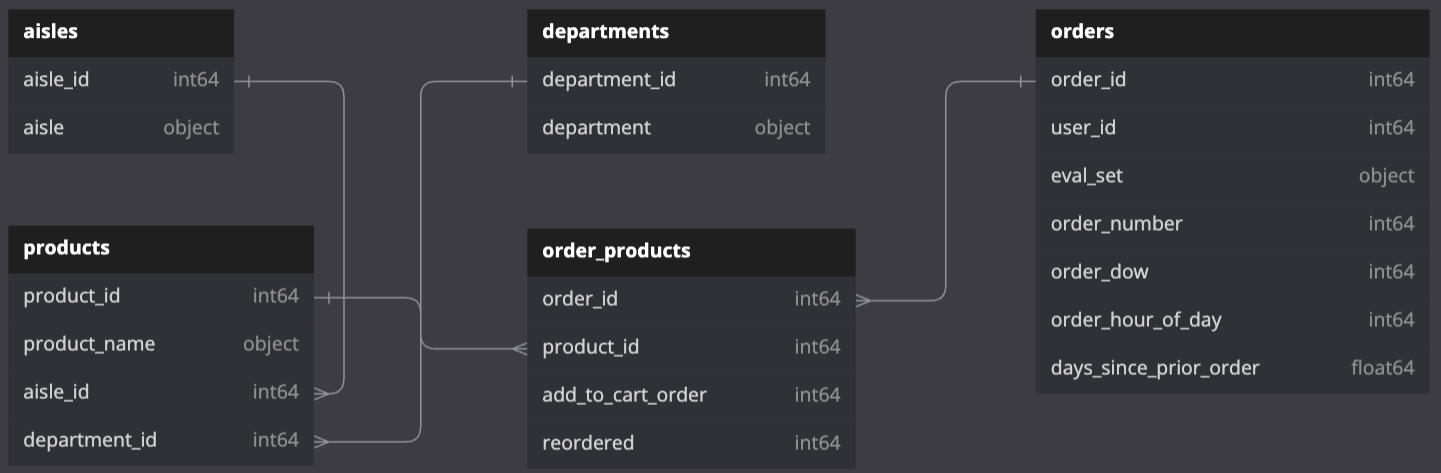

In [2]:
from IPython.display import display, Image
path_img = '/Users/marcobispo/Documents/Bees-Data-Challenge/data_schema.png'
display(Image(filename=path_img))

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
def read_multiple_csv(file_paths, names):
    if len(file_paths) != len(names):
        raise ValueError("The length of file_paths and names must be the same.")
    dataframes = {}
    for file_path, name in zip(file_paths, names):
        dataframes[name] = pd.read_csv(file_path)
    return dataframes
file_path = '/Users/marcobispo/Documents/Bees-Data-Challenge/Data-Challenge-V/online-shopping-dataset/'
file_paths = [file_path+'aisles.csv',
                file_path+'departments.csv',
                file_path+'order_products.csv',
                file_path+'orders.csv',
                file_path+'products.csv']
names = ['aisles', 'departments', 'order_products','orders','products']
dfs = read_multiple_csv(file_paths, names)
import pandas as pd
dict_quality_data = {
    'df_name': [],
    'column_name': [],
    'column_type': [],
    'NaN': [],
    'null': [],
    'duplicates':[],
    'uniques':[],
    'size':[],
    'describe':[]
}
dict_describe = {
    'aisles':{
        'aisle_id':'Uniquely identifies each aisle',
        'aisle':'Contains the name of the aisle'
    },
    'departments':{
        'department_id': 'Provides a unique identifier for each department',
        'department': 'Displays the name of the department'
    },
    'order_products':{
        'order_id':'Serves as a foreign key, linking to the unique order identifier',
        'product_id':'Functions as a foreign key, connecting to the unique product identifier',
        'add_to_cart_order': 'Reflects the order in which each product was added to the shopping cart',
        'reordered': 'Takes a value of 1 if the product has been ordered by the same user in the past, or 0 if not'
    },
    'orders':{
        'order_id': 'Uniquely identifies each order',
        'user_id': 'Identifies the customer associated with the order',
        'eval_set': 'Denotes the category to which this order belongs (refer to the SET descriptions below)'
            'The "SET" variable corresponds to one of two evaluation sets described below:'
            '■ "prior": Encompasses orders that occurred before the user\'s most recent order (approximately 3.2 million orders).'
            '■ "train": Comprises the training data supplied to participants (around 131,000 orders).',
        'order_number': "Represents the sequence number of the order for a user, where 1'denotes the first order and 'n' indicates the nth order",
        'order_dow': 'Indicates the day of the week when the order was placed',
        'order_hour_of_day': 'Specifies the hour at which the order was initiated',
        'days_since_prior_order': "Records the number of days that have elapsed since the user's previous order, capped at 30 days (with 'NAs' for the first order)"
        #days_since_prior:
    },
    'products':{
        'product_id': 'Serves as a unique identifier for each product',
        'product_name': 'Provides the name of the product',
        'aisle_id': 'Acts as a reference key for the aisle associated with the product',
        'department_id': 'Acts as a reference key for the department in which the product belongs'
    }
}
for name_df, df in dfs.items():
    for col in df.columns:
        series = df[col]
        n_nan = series.isna().sum()
        n_null = series.isnull().sum()
        duplicates = series.duplicated().sum()
        uniques = series.nunique()
        size = len(series)
        dict_quality_data['df_name'].append(name_df)
        dict_quality_data['column_name'].append(col)
        dict_quality_data['column_type'].append(series.dtype)
        dict_quality_data['NaN'].append(n_nan)
        dict_quality_data['null'].append(n_null)
        dict_quality_data['duplicates'].append(duplicates)
        dict_quality_data['uniques'].append(uniques)
        dict_quality_data['size'].append(size)
        dict_quality_data['describe'].append(dict_describe[name_df][col])
df_quality_data = pd.DataFrame(dict_quality_data)
display(df_quality_data)

,df_name,column_name,column_type,NaN,null,duplicates,uniques,size,describe
0,aisles,aisle_id,int64,0,0,0,134,134,Uniquely identifies each aisle
1,aisles,aisle,object,0,0,0,134,134,Contains the name of the aisle
2,departments,department_id,int64,0,0,0,21,21,Provides a unique identifier for each department
3,departments,department,object,0,0,0,21,21,Displays the name of the department
4,order_products,order_id,int64,0,0,30473023,3346083,33819106,"Serves as a foreign key, linking to the unique order identifier"
5,order_products,product_id,int64,0,0,33769421,49685,33819106,"Functions as a foreign key, connecting to the unique product identifier"
6,order_products,add_to_cart_order,int64,0,0,33818961,145,33819106,Reflects the order in which each product was added to the shopping cart
7,order_products,reordered,int64,0,0,33819104,2,33819106,"Takes a value of 1 if the product has been ordered by the same user in the past, or 0 if not"
8,orders,order_id,int64,0,0,0,3346083,3346083,Uniquely identifies each order
9,orders,user_id,int64,0,0,3139874,206209,3346083,Identifies the customer associated with the order


In [4]:
for name_df, df in dfs.items():
    print(name_df)
    display(df.head(2))

aisles


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses


departments


,department_id,department
0,1,frozen
1,2,other


order_products


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


products


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


## A.2 EDA data check
### Quick check to verify if the data descriptions match what is actually present in the dataframe otherwise, cleaning will be necessary.
### The description perfectly matches the data being analyzed however, the count of days of the week is starting from zero, for hours it makes sense, but for days not so much, but 7 values ​​are present within the list

In [5]:
reordered = dfs['order_products']['reordered'].unique().tolist()
reordered.sort()
print("dfs['order_products']['reordered']")
print(reordered)
order_number = dfs['orders']['order_number'].unique().tolist()
order_number.sort()
print("dfs['orders']['order_number']")
print(order_number)
order_dow = dfs['orders']['order_dow'].unique().tolist()
order_dow.sort()
print("dfs['orders']['order_dow']")
print(order_dow)
order_hour_of_day = dfs['orders']['order_hour_of_day'].unique().tolist()
order_hour_of_day.sort()
print("dfs['orders']['order_hour_of_day']")
print(order_hour_of_day)
days_since_prior_order = dfs['orders']['days_since_prior_order'].unique().tolist()
days_since_prior_order.sort()
print("dfs['orders']['days_since_prior_order']")
print(days_since_prior_order)

dfs['order_products']['reordered']
[0, 1]
dfs['orders']['order_number']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
dfs['orders']['order_dow']
[0, 1, 2, 3, 4, 5, 6]
dfs['orders']['order_hour_of_day']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
dfs['orders']['days_since_prior_order']
[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]


## A.3 EDA Data Visualization:
### Which product had the biggest sales and reordered?
#### Bananas and Bananas
### Which aisle had the biggest sales and reordered?
#### Fresh vegetables and fresh fruits
### Which department had the highest sales and reordered?
#### produce anda produce
### Which user ID had the highest sales and reordered?
#### 129928 and 201268
### Which days_since_prior_order of the week sell the most?
### 7
### Which order_dow of the month sell the most?
#### 0
### Which order_hour_of_day sell the most?
### 10 hours
#### Note: eval_set equals prior that mens the clients really buy the products ?	

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_order_products_products = pd.merge(dfs['order_products'], dfs['products'], on='product_id', how='left')
df_order_products_products_aisles = pd.merge(df_order_products_products, dfs['aisles'], on='aisle_id', how='left')
df_order_products_products_aisles_departments = pd.merge(df_order_products_products_aisles, dfs['departments'], on='department_id', how='left')
df_order_products_products_aisles_departments_orders = pd.merge(df_order_products_products_aisles_departments, dfs['orders'], on='order_id', how='left')
df_order_products_products_aisles_departments_orders = df_order_products_products_aisles_departments_orders[df_order_products_products_aisles_departments_orders['eval_set'] == 'prior']
df_visualization = df_order_products_products_aisles_departments_orders[["department","add_to_cart_order","reordered","product_name","aisle","eval_set","order_dow","order_number","order_hour_of_day","days_since_prior_order","user_id","order_id"]]
display(df_visualization)

,department,add_to_cart_order,reordered,product_name,aisle,eval_set,order_dow,order_number,order_hour_of_day,days_since_prior_order,user_id,order_id
0,dairy eggs,1,1,Organic Egg Whites,eggs,prior,5,3,9,8.0,202279,2
1,produce,2,1,Michigan Organic Kale,fresh vegetables,prior,5,3,9,8.0,202279,2
2,pantry,3,0,Garlic Powder,spices seasonings,prior,5,3,9,8.0,202279,2
3,pantry,4,1,Coconut Butter,oils vinegars,prior,5,3,9,8.0,202279,2
4,pantry,5,0,Natural Sweetener,baking ingredients,prior,5,3,9,8.0,202279,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,household,6,1,Free & Clear Natural Dishwasher Detergent,dish detergents,prior,2,24,6,21.0,25247,3421083
32434485,snacks,7,0,Organic Mini Sandwich Crackers Peanut Butter,crackers,prior,2,24,6,21.0,25247,3421083
32434486,frozen,8,0,All Natural French Toast Sticks,frozen breakfast,prior,2,24,6,21.0,25247,3421083
32434487,produce,9,1,Banana,fresh fruits,prior,2,24,6,21.0,25247,3421083


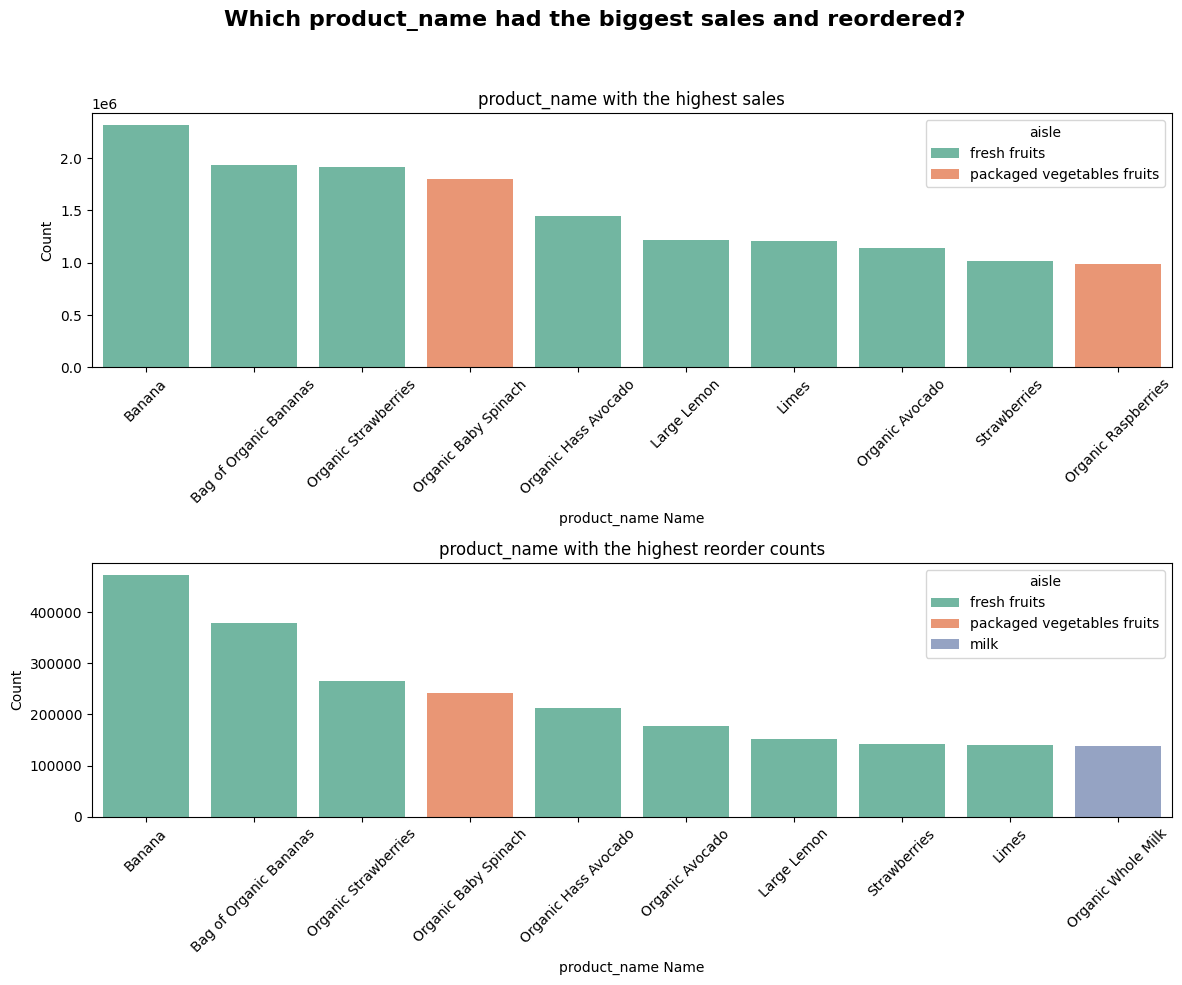

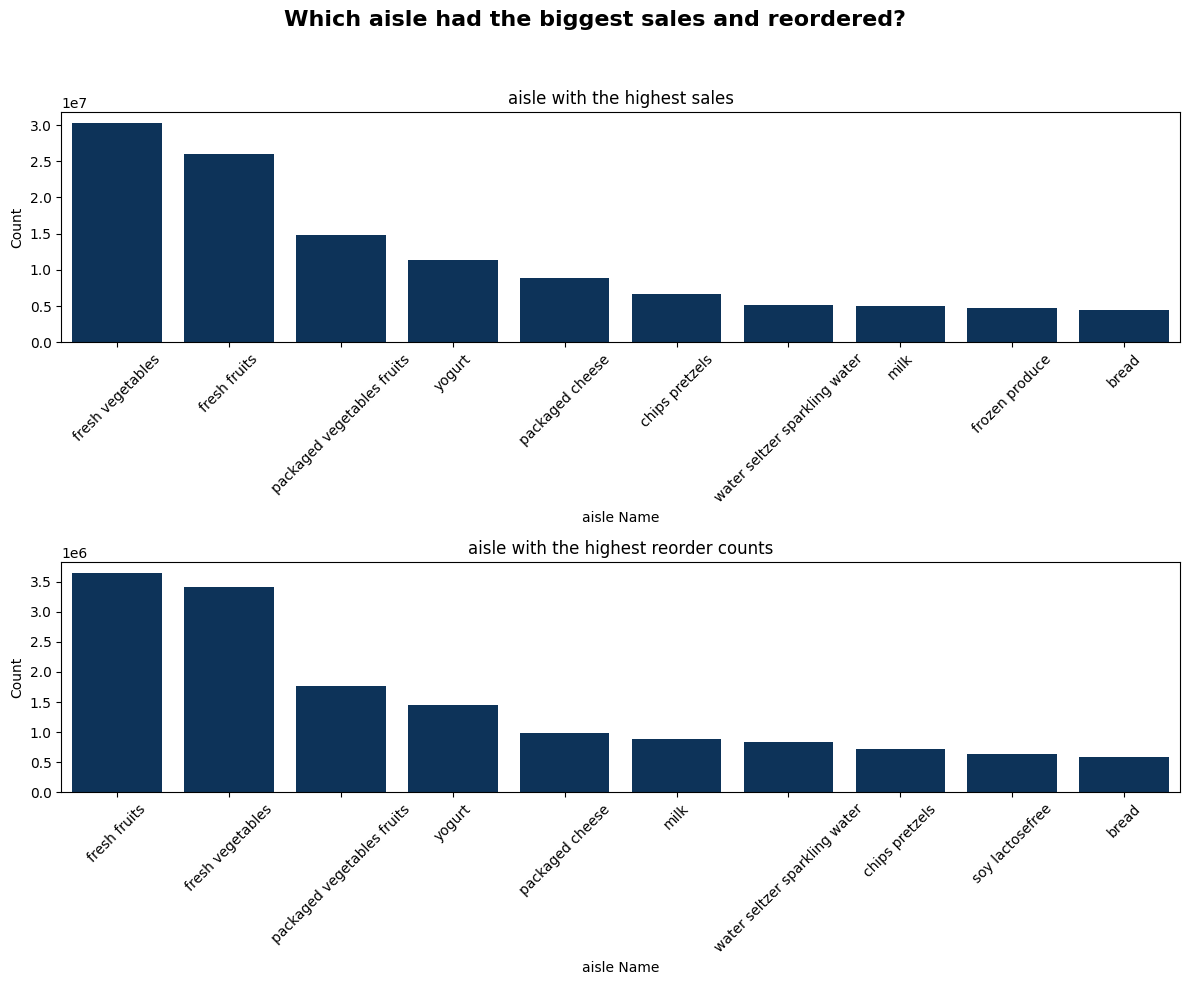

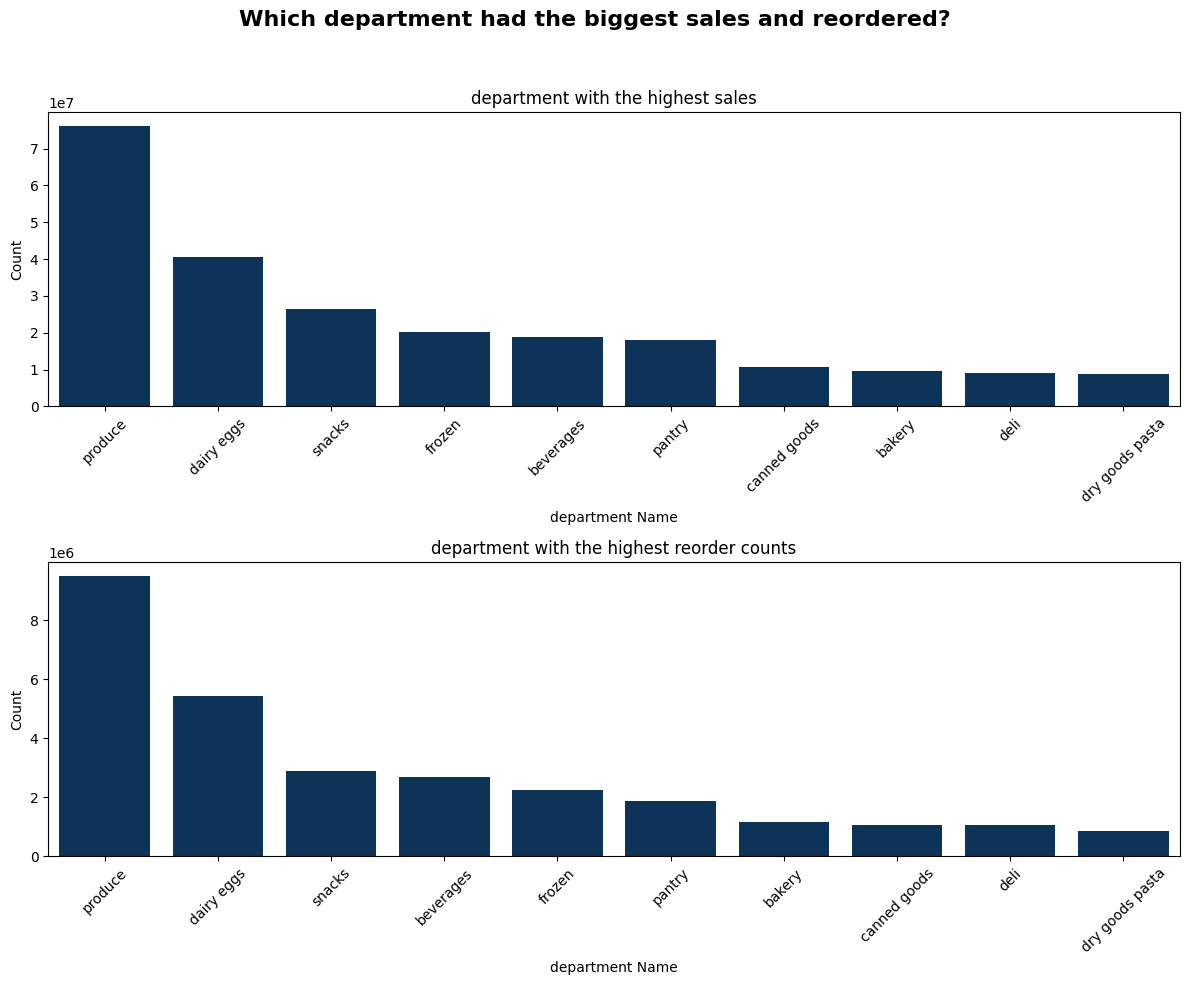

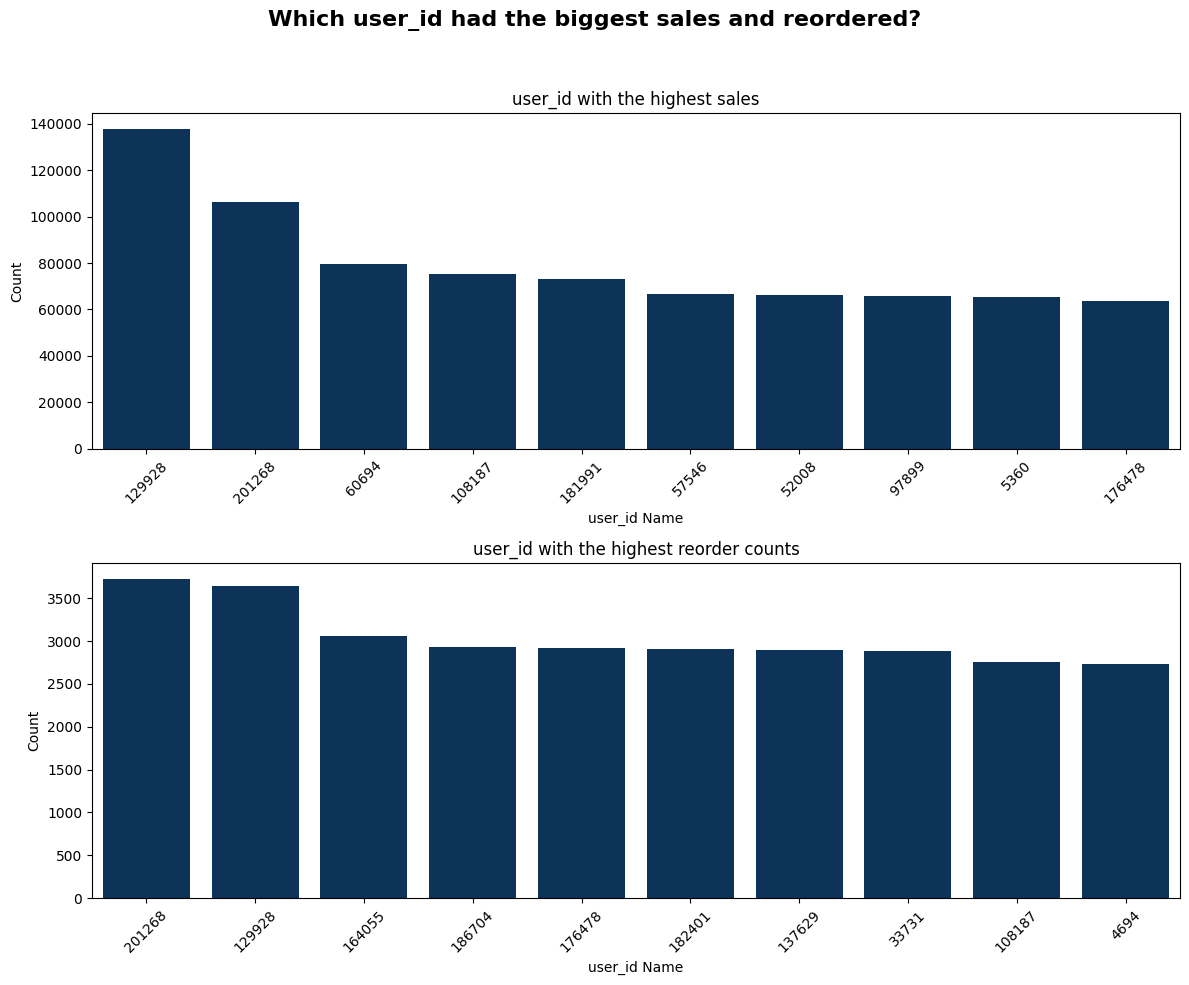

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def bar_plot_which(x, y1, y2, df, subtitle1, subtitle2, title, hue=None):
    plt.figure(figsize=(12, 10))
    

    plt.subplot(2, 1, 1)
    if hue:
        df_visualization_q2_1 = df.groupby([x,hue])[y1].sum().reset_index()
    else:
        df_visualization_q2_1 = df.groupby([x])[y1].sum().reset_index()
    df_visualization_q2_1 = df_visualization_q2_1.sort_values(by=y1, ascending=False).iloc[:10]
    if hue:
        ax1 = sns.barplot(x=x, y=y1, hue=hue, data=df_visualization_q2_1, dodge=False, palette='Set2', order=df_visualization_q2_1[x])
    else:
        ax1 = sns.barplot(x=x, y=y1, data=df_visualization_q2_1, dodge=False, color='#003366', order=df_visualization_q2_1[x])
    ax1.set_title(subtitle1)
    ax1.set_xlabel(x + ' Name')
    ax1.set_ylabel('Count')
    ax1.set_xticks(range(len(df_visualization_q2_1)))
    ax1.set_xticklabels(df_visualization_q2_1[x], rotation=45)
    

    plt.subplot(2, 1, 2)
    if hue:
        df_visualization_q2_2 = df.groupby([x,hue])[y2].count().reset_index()
    else:
        df_visualization_q2_2 = df.groupby([x])[y2].count().reset_index()
    df_visualization_q2_2 = df_visualization_q2_2.sort_values(by=y2, ascending=False).iloc[:10]
    if hue:
        ax2 = sns.barplot(x=x, y=y2, hue=hue, data=df_visualization_q2_2, dodge=False, palette='Set2', order=df_visualization_q2_2[x])
    else:
        ax2 = sns.barplot(x=x, y=y2, data=df_visualization_q2_2, dodge=False, color='#003366', order=df_visualization_q2_2[x])
    ax2.set_title(subtitle2)
    ax2.set_xlabel(x + ' Name')
    ax2.set_ylabel('Count')
    ax2.set_xticks(range(len(df_visualization_q2_2)))
    ax2.set_xticklabels(df_visualization_q2_2[x], rotation=45)
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



x = 'product_name'
y1 = 'add_to_cart_order'
y2 = 'reordered'
hue = 'aisle'
subtitle1 = (f"{x} with the highest sales")
subtitle2 = (f"{x} with the highest reorder counts")
title = (f"Which {x} had the biggest sales and reordered?")
bar_plot_which(x, y1, y2, df_visualization, subtitle1, subtitle2, title, hue)

x = 'aisle'
y1 = 'add_to_cart_order'
y2 = 'reordered'
subtitle1 = (f"{x} with the highest sales")
subtitle2 = (f"{x} with the highest reorder counts")
title = (f"Which {x} had the biggest sales and reordered?")
bar_plot_which(x, y1, y2, df_visualization, subtitle1, subtitle2, title)

x = 'department'
y1 = 'add_to_cart_order'
y2 = 'reordered'
hue = 'aisle'
subtitle1 = (f"{x} with the highest sales")
subtitle2 = (f"{x} with the highest reorder counts")
title = (f"Which {x} had the biggest sales and reordered?")
bar_plot_which(x, y1, y2, df_visualization, subtitle1, subtitle2, title)

x = 'user_id'
y1 = 'add_to_cart_order'
y2 = 'reordered'
hue = 'aisle'
subtitle1 = (f"{x} with the highest sales")
subtitle2 = (f"{x} with the highest reorder counts")
title = (f"Which {x} had the biggest sales and reordered?")
bar_plot_which(x, y1, y2, df_visualization, subtitle1, subtitle2, title)

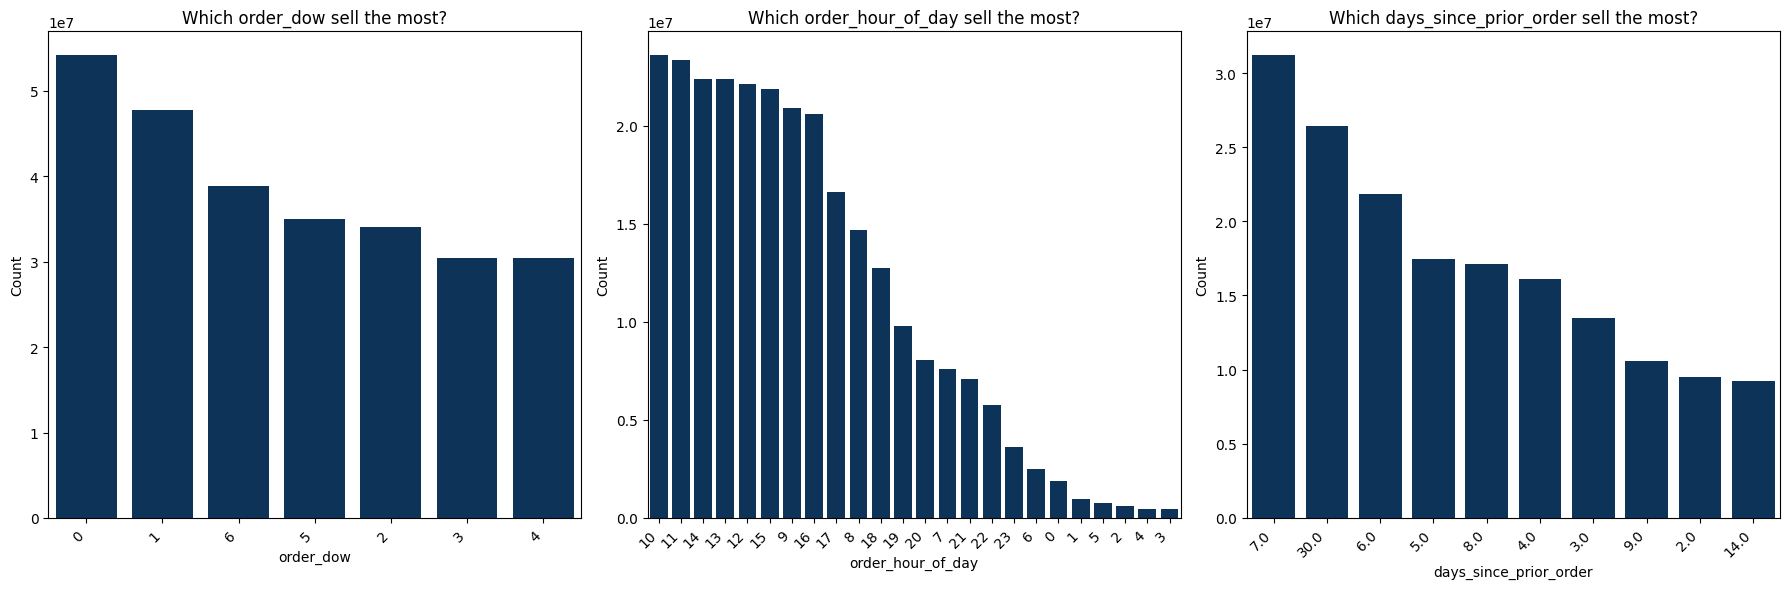

In [28]:
def bar_plot_which_time(x, y1, df, title, size, hue=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 10))
    
    if hue:
        df_agg = df.groupby([x, hue])[y1].count().reset_index()
    else:
        df_agg = df.groupby(x)[y1].sum().reset_index()
    
    df_top = df_agg.sort_values(by=y1, ascending=False).iloc[:size]
    
    if hue:
        sns.barplot(x=x, y=y1, hue=hue, data=df_top, dodge=False, palette='Set2', order=df_top[x], ax=ax)
    else:
        sns.barplot(x=x, y=y1, data=df_top, dodge=False, color='#003366', order=df_top[x], ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel('Count')
    
    ax.set_xticks(range(len(df_top[x])))
    ax.set_xticklabels(df_top[x], rotation=45, ha='right')
    
    if hue:
        ax.legend(title=hue)
    
    plt.tight_layout()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

params = [
    {'x': 'order_dow', 'y1': 'add_to_cart_order', 'title': 'Which order_dow sell the most?', 'size': 10},
    {'x': 'order_hour_of_day', 'y1': 'add_to_cart_order', 'title': 'Which order_hour_of_day sell the most?', 'size': 24},
    {'x': 'days_since_prior_order', 'y1': 'add_to_cart_order', 'title': 'Which days_since_prior_order sell the most?', 'size': 10}
]

for i, param in enumerate(params):
    bar_plot_which_time(param['x'], param['y1'], df_visualization, param['title'], param['size'], ax=axes[i])

plt.tight_layout()
plt.show()


In [36]:
df_visualization_id2 = df_visualization[df_visualization['order_id']==4]
df_visualization_id2

,department,add_to_cart_order,reordered,product_name,aisle,eval_set,order_dow,order_number,order_hour_of_day,days_since_prior_order,user_id,order_id
17,bakery,1,0,Plain Pre-Sliced Bagels,breakfast bakery,prior,1,36,9,7.0,178520,4
18,personal care,2,1,Honey/Lemon Cough Drops,cold flu allergy,prior,1,36,9,7.0,178520,4
19,snacks,3,1,Chewy 25% Low Sugar Chocolate Chip Granola,energy granola bars,prior,1,36,9,7.0,178520,4
20,breakfast,4,1,Oats & Chocolate Chewy Bars,breakfast bars pastries,prior,1,36,9,7.0,178520,4
21,breakfast,5,1,Kellogg's Nutri-Grain Apple Cinnamon Cereal,breakfast bars pastries,prior,1,36,9,7.0,178520,4
22,breakfast,6,1,Nutri-Grain Soft Baked Strawberry Cereal Breakfast Bars,breakfast bars pastries,prior,1,36,9,7.0,178520,4
23,breakfast,7,1,Kellogg's Nutri-Grain Blueberry Cereal,breakfast bars pastries,prior,1,36,9,7.0,178520,4
24,snacks,8,1,Tiny Twists Pretzels,chips pretzels,prior,1,36,9,7.0,178520,4
25,snacks,9,1,Traditional Snack Mix,trail mix snack mix,prior,1,36,9,7.0,178520,4
26,snacks,10,1,Goldfish Cheddar Baked Snack Crackers,crackers,prior,1,36,9,7.0,178520,4


# B- Statistical analysis

## B.1 Descriptive Statistics Statistical graphs
### Notes:
#### No distribution is normal visually
#### As the data is extremely full of outliers regardless of the time, department or day of the week, it is obvious to delve deeper into these studies and separate a workforce to work with them.
#### In the histogram of hours of the day, order dow and days_since_prio_order, a significant peak was observed
#### The median ordering hours are very similar for all departments, logically alcoholic beverages are higher as they are generally sold at dusk
#### Looking at the order_dow box plot we can clearly divide the median into two types, in other words, the departments are divided into two types, their median is concentrated either on day two or day 3
#### There are many sales outliers in all types of departments, but the median sales tend to be very low, indicating that products are sold to simple customers and not to subsequent merchants who make large purchases
#### There is a negative but very low correlation between days_since_prior_order and sales, in addition to a slightly low but positive correlation between sales with reordered and sales and order_hour_of_day

In [405]:
import matplotlib.pyplot as plt
import seaborn as sns

df_statistical_analysis = df_order_products_products_aisles_departments_orders
df_statistical_analysis.head(2)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0


In [406]:
df_order_products_products_aisles_departments_orders['department'].unique()

array(['dairy eggs', 'produce', 'pantry', 'meat seafood', 'bakery',
       'personal care', 'snacks', 'breakfast', 'beverages', 'deli',
       'household', 'international', 'dry goods pasta', 'frozen',
       'canned goods', 'babies', 'pets', 'alcohol', 'bulk', 'missing',
       'other'], dtype=object)

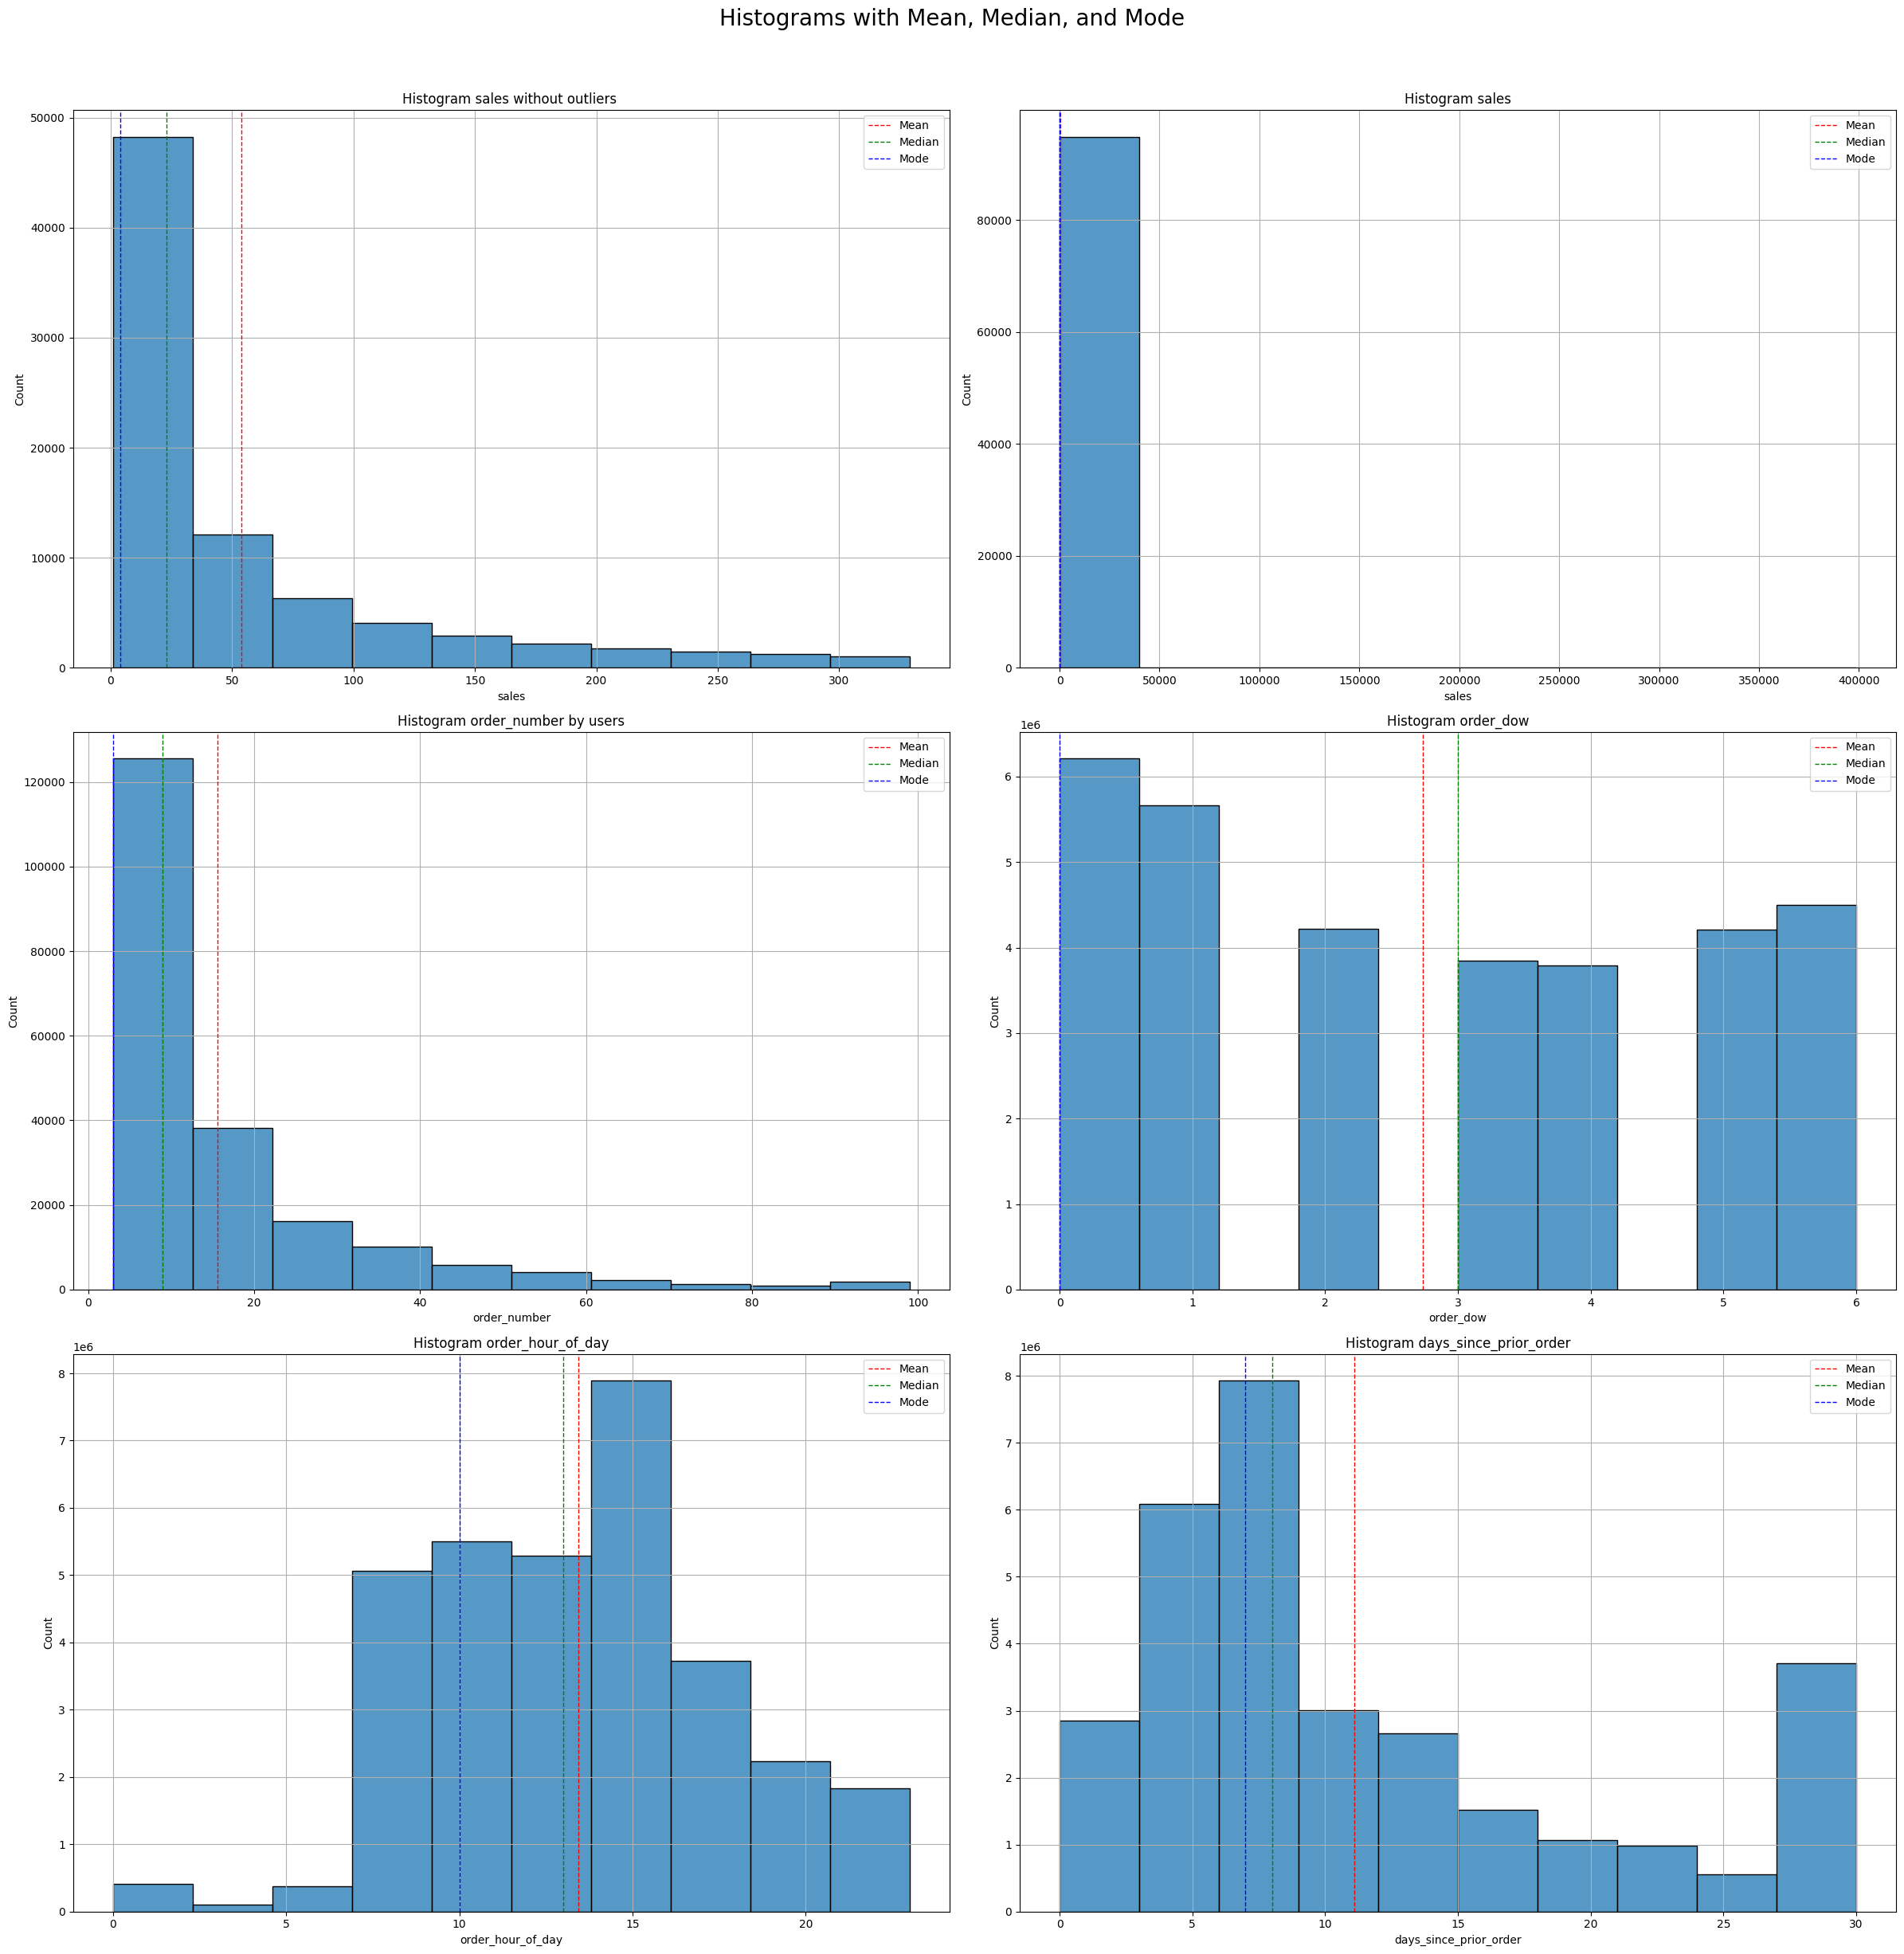

In [414]:
df_product_sales = df_statistical_analysis.groupby(['department','aisle','product_name','reordered'])['add_to_cart_order'].count().reset_index()
df_product_sales = df_product_sales.rename(columns={'add_to_cart_order':'sales'})
Q1 = df_product_sales['sales'].quantile(0.25)
Q3 = df_product_sales['sales'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
df_product_sales_without_outliers = df_product_sales[(df_product_sales['sales'] >= limite_inferior) & (df_product_sales['sales'] <= limite_superior)]
plt.figure(figsize=(24, 24))

plt.subplot(3, 2, 1)
sns.histplot(data=df_product_sales_without_outliers, x="sales", bins=10)
plt.axvline(df_product_sales_without_outliers['sales'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df_product_sales_without_outliers['sales'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(df_product_sales_without_outliers['sales'].mode()[0], color='blue', linestyle='dashed', linewidth=1, label='Mode')
plt.title('Histogram sales without outliers ')
plt.grid(True)
plt.legend()

plt.subplot(3, 2, 2)
sns.histplot(data=df_product_sales, x="sales", bins=10)
plt.axvline(df_product_sales['sales'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df_product_sales['sales'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(df_product_sales['sales'].mode()[0], color='blue', linestyle='dashed', linewidth=1, label='Mode')
plt.title('Histogram sales')
plt.grid(True)
plt.legend()

plt.subplot(3, 2, 3)
df_order_number_user = df_statistical_analysis.groupby(['user_id'])['order_number'].max().reset_index()
sns.histplot(data=df_order_number_user, x='order_number', bins=10)
plt.axvline(df_order_number_user['order_number'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df_order_number_user['order_number'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(df_order_number_user['order_number'].mode()[0], color='blue', linestyle='dashed', linewidth=1, label='Mode')
plt.title('Histogram order_number by users')
plt.grid(True)
plt.legend()

plt.subplot(3, 2, 4)
sns.histplot(data=df_order_products_products_aisles_departments_orders, x="order_dow", bins=10)
plt.axvline(df_order_products_products_aisles_departments_orders['order_dow'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df_order_products_products_aisles_departments_orders['order_dow'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(df_order_products_products_aisles_departments_orders['order_dow'].mode()[0], color='blue', linestyle='dashed', linewidth=1, label='Mode')
plt.title('Histogram order_dow')
plt.grid(True)
plt.legend()

plt.subplot(3, 2, 5)
sns.histplot(data=df_order_products_products_aisles_departments_orders, x="order_hour_of_day", bins=10)
plt.axvline(df_order_products_products_aisles_departments_orders['order_hour_of_day'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df_order_products_products_aisles_departments_orders['order_hour_of_day'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(df_order_products_products_aisles_departments_orders['order_hour_of_day'].mode()[0], color='blue', linestyle='dashed', linewidth=1, label='Mode')
plt.title('Histogram order_hour_of_day')
plt.grid(True)
plt.legend()

plt.subplot(3, 2, 6)
sns.histplot(data=df_order_products_products_aisles_departments_orders, x="days_since_prior_order", bins=10)
plt.axvline(df_order_products_products_aisles_departments_orders['days_since_prior_order'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df_order_products_products_aisles_departments_orders['days_since_prior_order'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(df_order_products_products_aisles_departments_orders['days_since_prior_order'].mode()[0], color='blue', linestyle='dashed', linewidth=1, label='Mode')
plt.title('Histogram days_since_prior_order')
plt.grid(True)
plt.legend()

plt.suptitle('Histograms with Mean, Median, and Mode', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

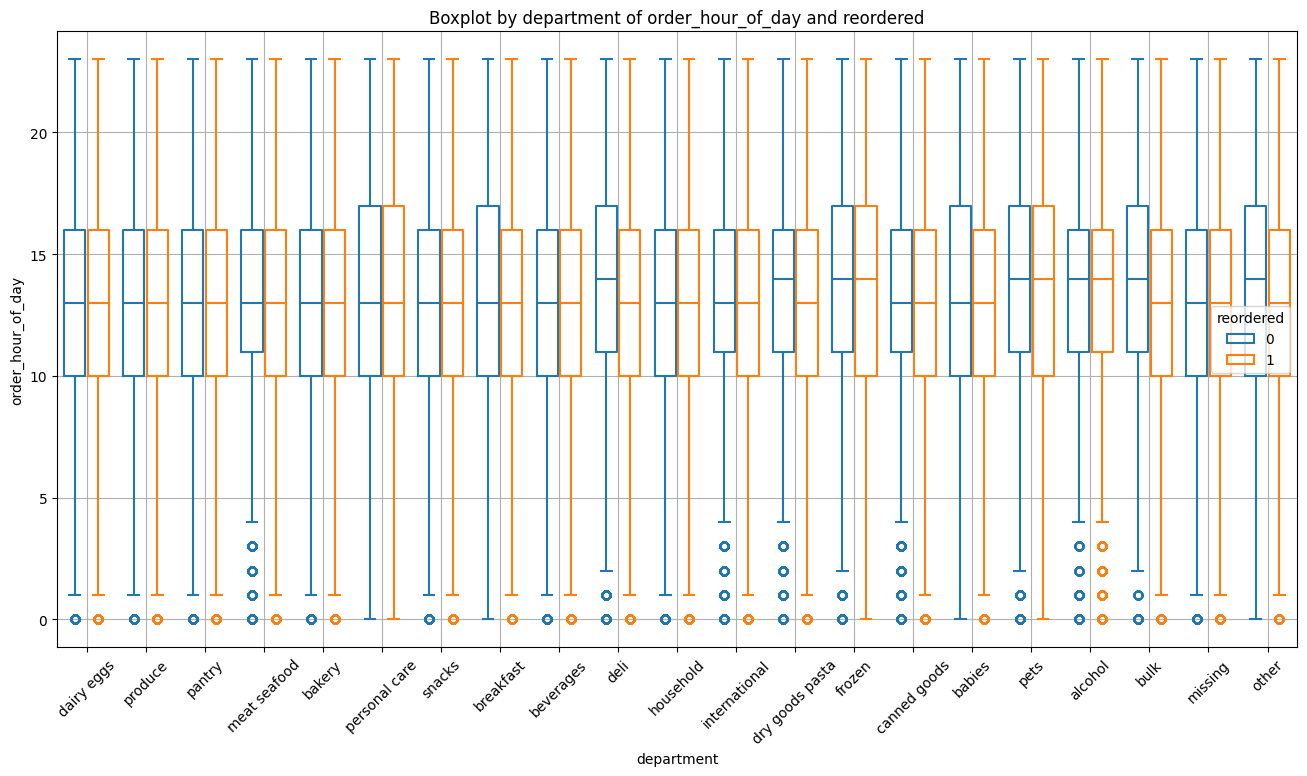

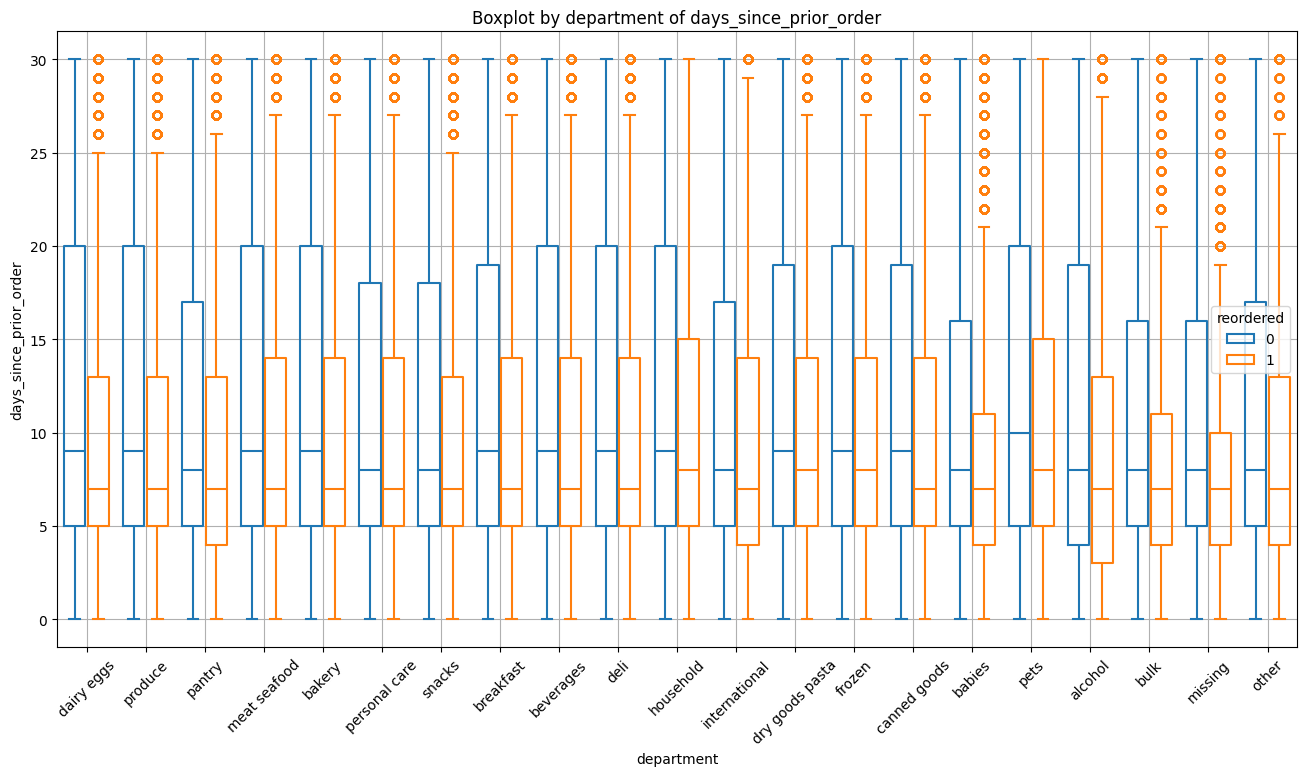

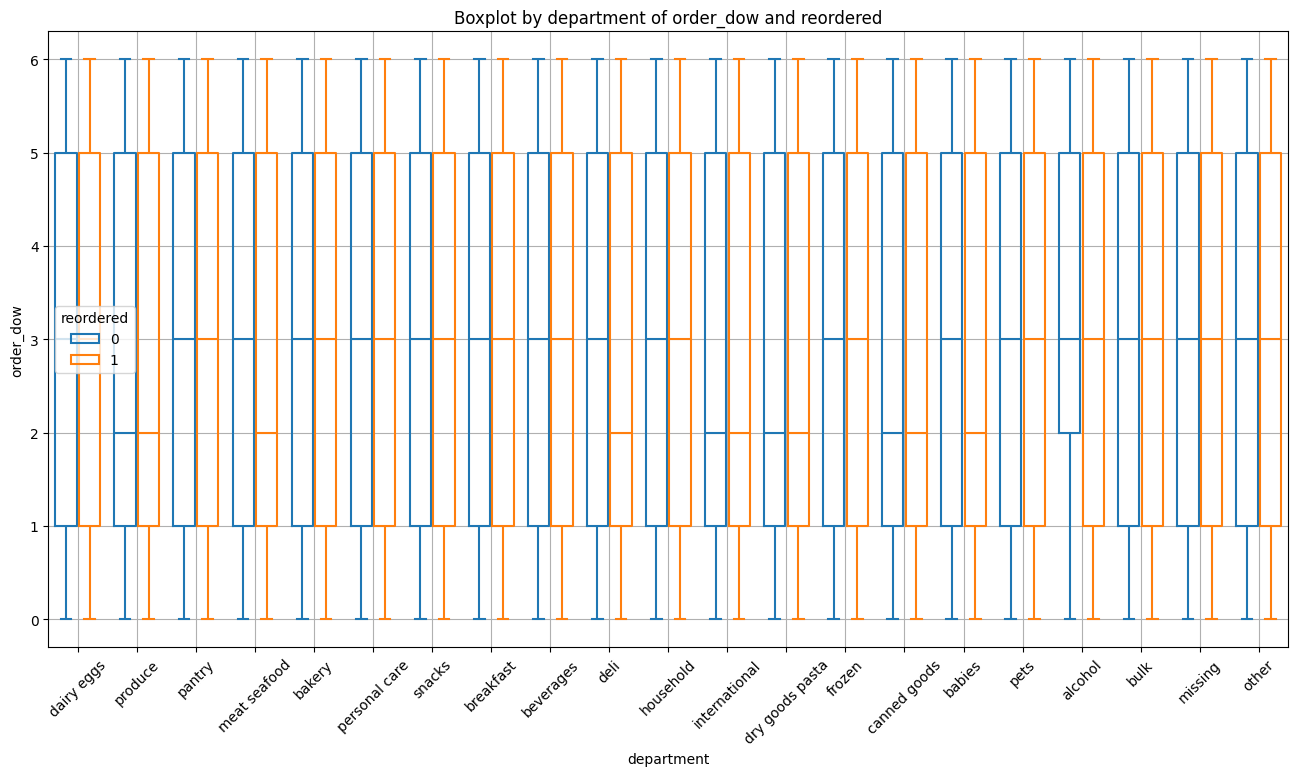

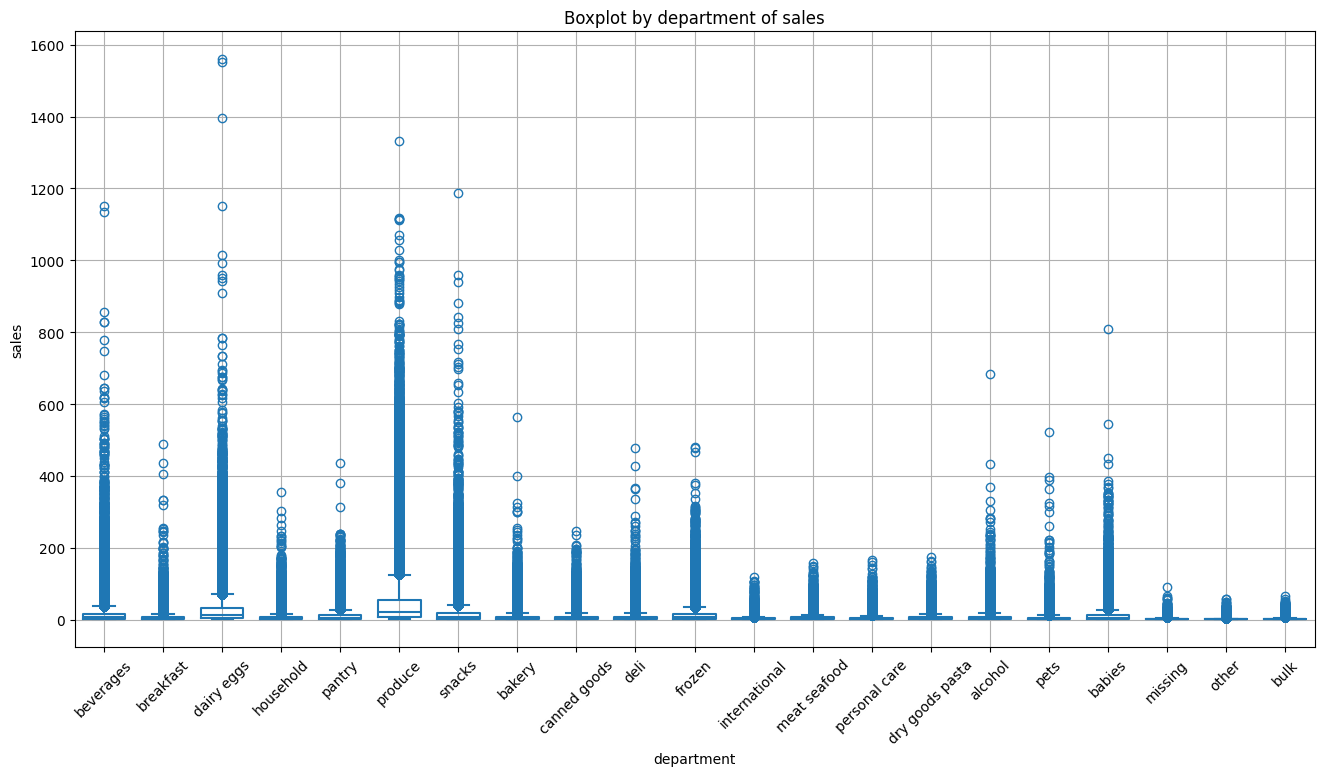

In [408]:
def plot_boxplot_by_department(data, x, y,  title, hue=None):
    plt.figure(figsize=(16, 8))
    if hue:
        sns.boxplot(data=data, x=x, y=y, hue=hue, fill=False, gap=0.1)
    else:
        sns.boxplot(data=data, x=x, y=y, fill=False, gap=0.1)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.grid(True)
    plt.show()

df_user =  df_statistical_analysis.groupby(['user_id','department'])['add_to_cart_order'].count().reset_index()
df_user = df_user.rename(columns={'add_to_cart_order':'sales'})

plot_boxplot_by_department(df_order_products_products_aisles_departments_orders,
                            "department", "order_hour_of_day",
                            "Boxplot by department of order_hour_of_day and reordered", "reordered")

plot_boxplot_by_department(df_order_products_products_aisles_departments_orders,
                            "department", "days_since_prior_order",
                            "Boxplot by department of days_since_prior_order", "reordered")

plot_boxplot_by_department(df_order_products_products_aisles_departments_orders,
                            "department", "order_dow",
                            "Boxplot by department of order_dow and reordered", "reordered")

plot_boxplot_by_department(df_user,
                            "department", "sales",
                            "Boxplot by department of sales")


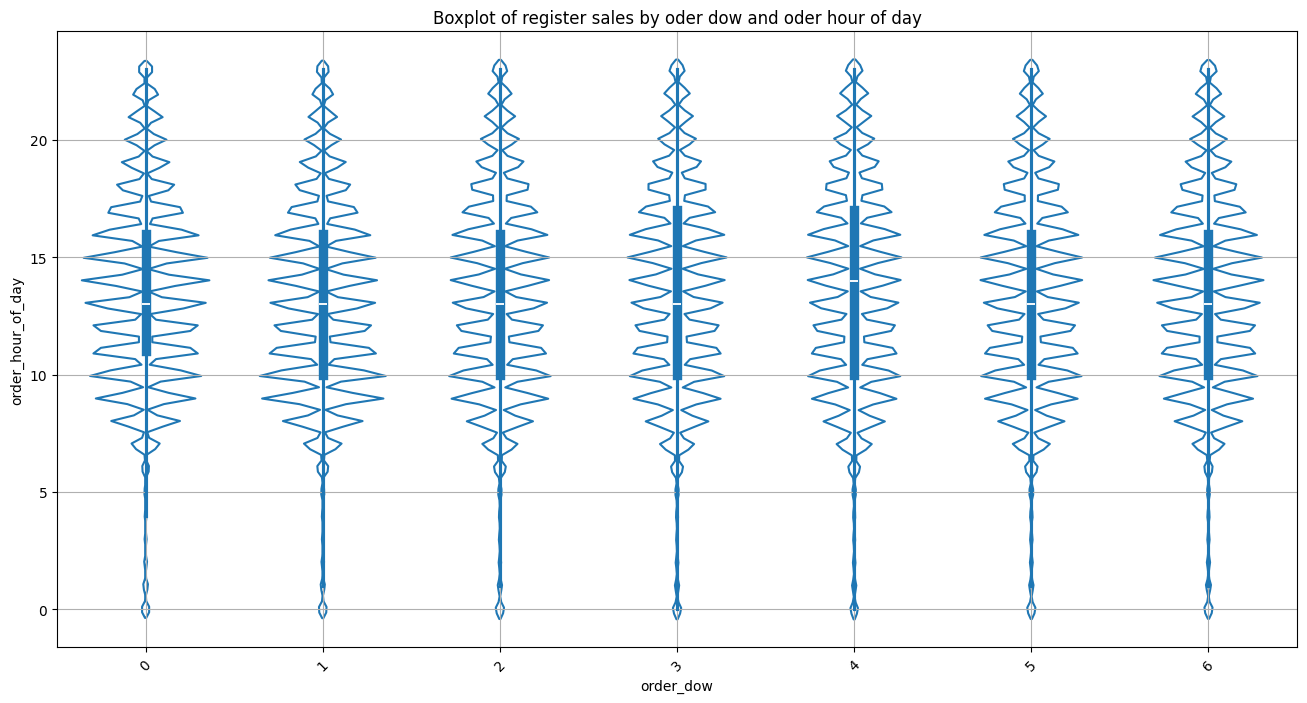

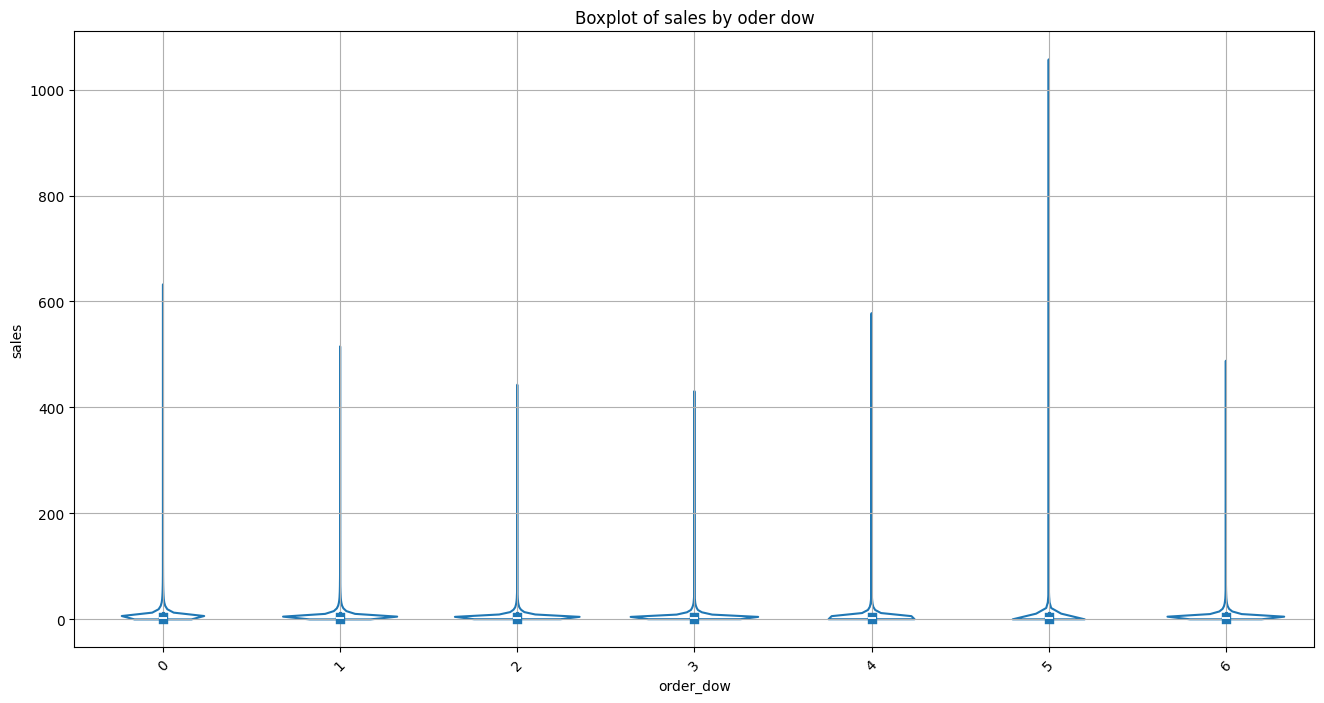

In [412]:
def plot_boxplot_by_department(data, x, y,  title, hue=None):
    plt.figure(figsize=(16, 8))
    if hue:
        sns.violinplot(data=data, x=x, y=y, hue=hue, fill=False, gap=0.1)
    else:
        sns.violinplot(data=data, x=x, y=y, fill=False, gap=0.1)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.grid(True)
    plt.show()

df_user =  df_statistical_analysis.groupby(['user_id','department','order_dow'])['add_to_cart_order'].count().reset_index()
df_user = df_user.rename(columns={'add_to_cart_order':'sales'})

plot_boxplot_by_department(df_order_products_products_aisles_departments_orders,
                            "order_dow", "order_hour_of_day",
                            "Boxplot and violin of register sales by oder dow and oder hour of day")


plot_boxplot_by_department(df_user,
                            "order_dow", "sales",
                            "Boxplot and violin of sales by oder dow")

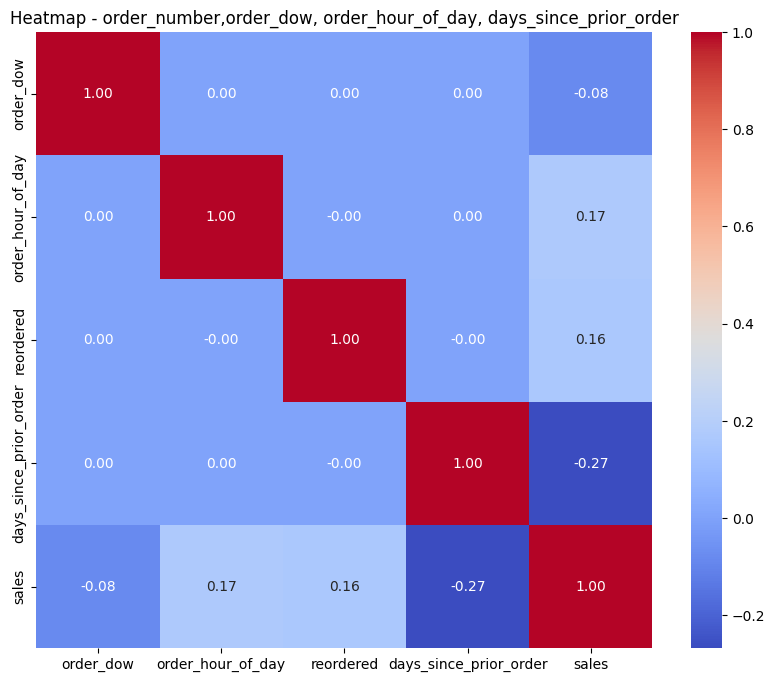

In [74]:

df_after_heatmap = df_statistical_analysis.groupby(['order_dow','order_hour_of_day','reordered','days_since_prior_order'])['add_to_cart_order'].count().reset_index()
df_after_heatmap = df_after_heatmap.rename(columns={'add_to_cart_order':'sales'})
data = df_after_heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Heatmap - order_number,order_dow, order_hour_of_day, days_since_prior_order')
plt.show()

## B.2 Inferential Statistics Hypothesis testing

### B.2.1 Corelations (spearman):
#### Notes:
#### This test was chosen because spearman is better than pearson for non-normal distributions
##### The columns 'reordered', 'order_dow', 'order_hour_of_day', 'days_since_prior_order' have a significant relationship in the spearman test, however very low, only 'reordered' was positive
##### The two highest departmental correlations were low but also passed without significance testing were breakfast with frozen foods and dairy eggs with frozen foods.

In [115]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
df_inf_statitics = df_order_products_products_aisles_departments_orders.groupby(['department','aisle','product_name',
        'reordered','order_dow','order_hour_of_day','days_since_prior_order'])['add_to_cart_order'].count().reset_index()
df_inf_statitics = df_inf_statitics.rename(columns={'add_to_cart_order':'sales'})
df_inf_statitics

,department,aisle,product_name,reordered,order_dow,order_hour_of_day,days_since_prior_order,sales
0,alcohol,beers coolers,'Swingtop' Premium Lager,0,0,19,30.0,1
1,alcohol,beers coolers,12 Oz Beer,0,0,7,6.0,1
2,alcohol,beers coolers,12 Oz Beer,0,0,8,11.0,1
3,alcohol,beers coolers,12 Oz Beer,0,0,10,30.0,1
4,alcohol,beers coolers,12 Oz Beer,0,0,12,3.0,1
...,...,...,...,...,...,...,...,...
15243147,snacks,trail mix snack mix,Wholesome Medley,1,2,15,13.0,1
15243148,snacks,trail mix snack mix,Wholesome Medley,1,2,18,1.0,1
15243149,snacks,trail mix snack mix,Wholesome Medley,1,4,13,1.0,1
15243150,snacks,trail mix snack mix,Wholesome Medley,1,5,8,0.0,1


Spearman correlation between 'sales' and 'reordered': 0.10, p-value: 0.0000, significant
Spearman correlation between 'sales' and 'order_dow': -0.03, p-value: 0.0000, significant
Spearman correlation between 'sales' and 'order_hour_of_day': -0.02, p-value: 0.0000, significant
Spearman correlation between 'sales' and 'days_since_prior_order': -0.07, p-value: 0.0000, significant


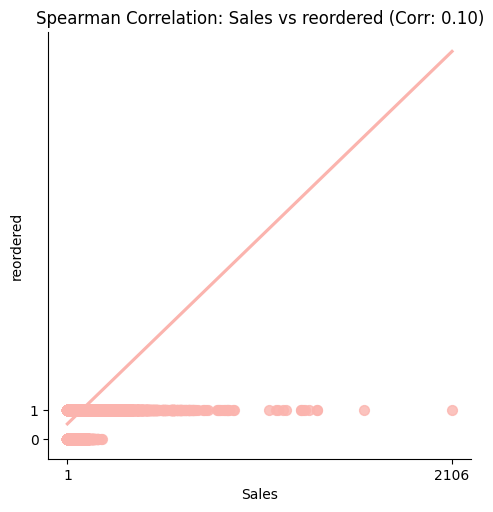

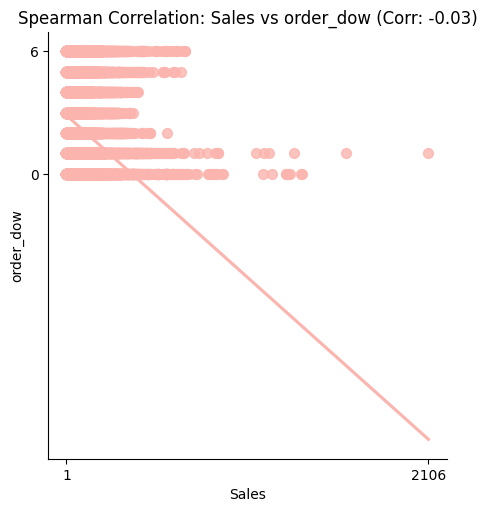

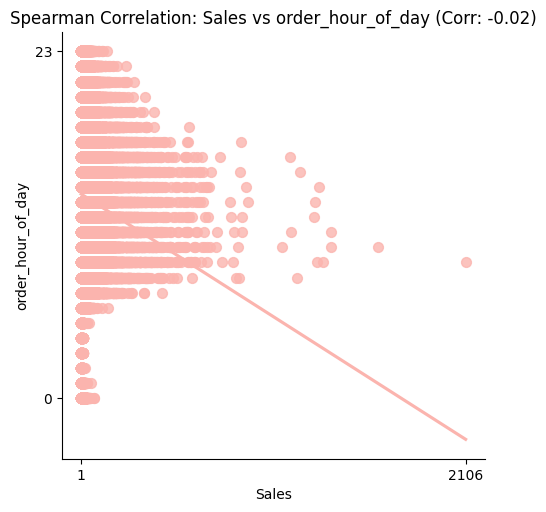

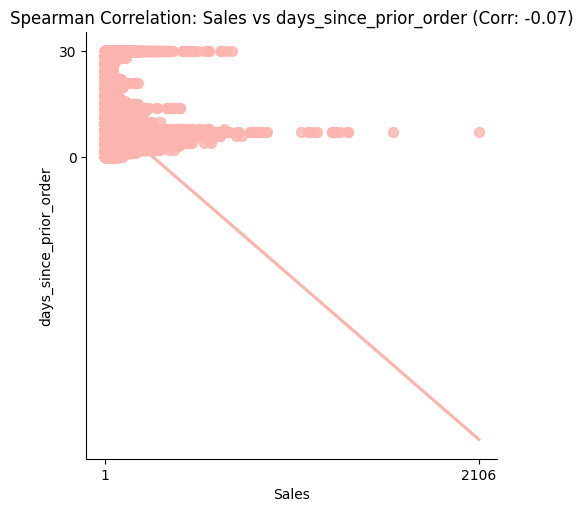

In [93]:
correlations = {}
principal_col = df_inf_statitics['sales']

columns = ['reordered', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

# Calculating Spearman correlation
for col in columns:
    corr, p_value = spearmanr(principal_col, df_inf_statitics[col])
    significance = 'significant' if p_value < 0.05 else 'not significant'
    correlations[col] = (corr, p_value, significance)

# Printing the results
for col, (corr, p_value, significance) in correlations.items():
    print(f"Spearman correlation between 'sales' and '{col}': {corr:.2f}, p-value: {p_value:.4f}, {significance}")

# Plotting the graphs
for col in columns:
    plot = sns.lmplot(x='sales', y=col, data=df_inf_statitics, ci=None, scatter_kws={'s': 50})
    plt.title(f'Spearman Correlation: Sales vs {col} (Corr: {correlations[col][0]:.2f})')
    plt.xlabel('Sales')
    plt.ylabel(col)
    
    x_min, x_max = df_inf_statitics['sales'].min(), df_inf_statitics['sales'].max()
    y_min, y_max = df_inf_statitics[col].min(), df_inf_statitics[col].max()
    
    ax = plot.axes[0, 0]
    ax.set_xticks([x_min, x_max])
    ax.set_yticks([y_min, y_max])
    
    plt.show()

In [116]:
import pandas as pd
from scipy.stats import spearmanr
import numpy as np


min_dept_size = df_inf_statitics.groupby('department').size().min()

sampled_data = pd.DataFrame()
for department in df_inf_statitics['department'].unique():
    dept_data = df_inf_statitics[df_inf_statitics['department'] == department].sample(min_dept_size, random_state=42)
    sampled_data = pd.concat([sampled_data, dept_data], ignore_index=True)

correlations = {}
departments = sampled_data['department'].unique()

for i, department1 in enumerate(departments):
    for j, department2 in enumerate(departments):
        if i != j:
            sales1 = sampled_data[sampled_data['department'] == department1]['sales']
            sales2 = sampled_data[sampled_data['department'] == department2]['sales']
            
            # Verificar se as séries têm dados
            if not sales1.empty and not sales2.empty:
                correlation, p_value = spearmanr(sales1, sales2)
                correlations[(department1, department2)] = (correlation, p_value)

df_correlations ={
    'department1':[],
    'department2':[],
    'correlation':[],
    'p_value':[]
}
for (department1, department2), (correlation, p_value) in correlations.items():
    if p_value < 0.05:
        df_correlations['department1'].append(department1)
        df_correlations['department2'].append(department2)
        df_correlations['correlation'].append(correlation)
        df_correlations['p_value'].append(p_value)
df_correlations = pd.DataFrame(df_correlations)
df_correlations = df_correlations.sort_values(by='correlation',ascending=False)
df_correlations = df_correlations.drop_duplicates(subset=['correlation'])
df_correlations


,department1,department2,correlation,p_value
4,breakfast,frozen,0.021685,0.001794
8,dairy eggs,frozen,0.019386,0.005250
0,alcohol,pets,0.018253,0.008585
24,other,snacks,0.018183,0.008843
21,meat seafood,personal care,0.016949,0.014673
6,dairy eggs,bakery,0.015949,0.021656
19,international,pantry,0.015710,0.023705
30,pets,other,0.015562,0.025047
23,other,pets,0.015562,0.025047
31,produce,deli,0.015020,0.030579


### B.2.2 Analysis of Variance (ANOVA):
#### The variables analyzed (department, day of the week of the order and days since the last order) have a statistically significant impact on sales.

In [127]:
import pandas as pd
from scipy.stats import f_oneway
def anova(ga):
    groups = []
    for product in df_inf_statitics[ga].unique():
        groups.append(df_inf_statitics[df_inf_statitics[ga] == product]['sales'])
    f_statistic, p_value = f_oneway(*groups)
    print(f'F-statistic: {f_statistic:.2f}')
    print(f'P-value: {p_value:.4f}')
    if p_value < 0.05:
        print(f'P-value indicates statistically significant difference between the {ga} and sales groups.')
    else:
        print(f'P-value does not indicate a statistically significant difference between the {ga} and sales groups.')
        
anova('department')
anova('order_dow')
anova('days_since_prior_order')

F-statistic: 23461.67
P-value: 0.0000
P-value indicates statistically significant difference between the department and sales groups.
F-statistic: 2320.38
P-value: 0.0000
P-value indicates statistically significant difference between the order_dow and sales groups.
F-statistic: 3546.82
P-value: 0.0000
P-value indicates statistically significant difference between the days_since_prior_order and sales groups.


## B.3 Inferential Statistics Principal Component Analysis (PCA)
### Notes:
#### The sum of the two components resulted in more than **80%**
#### Sales and roerdem are 90 degrees in the correlation circle, that is, they have no correlation sales with days_since_prior_order gave the complete opposite, that is, a highly negative correlation, the hours of the day have a very low, but negative, relationship
### We can divide sales between 2 groups of clusters, the elbow curve was very soft.

#### BETWEEN t-SNE, MDS and PCA, WHY PCA ?
#### The main objective is to reduce dimensionality while retaining as much variance as possible in the data.
#### Direct interpretation of the components is important.
#### Computational efficiency is a critical factor.
#### normalization and get dummies were applied, but it lowered the sum of the two components, so it was ignored to increase the efficiency of the pca

In [23]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df_inf_statitics = df_order_products_products_aisles_departments_orders.groupby(['department','aisle','product_name',
        'reordered','order_dow','order_hour_of_day','days_since_prior_order'])['add_to_cart_order'].count().reset_index()
df_inf_statitics = df_inf_statitics.rename(columns={'add_to_cart_order':'sales'})
df_pca = df_inf_statitics[['reordered','order_dow','order_hour_of_day','days_since_prior_order','sales']]
#df_pca = df_inf_statitics[['reordered','order_dow','order_hour_of_day','days_since_prior_order','sales','department']]
#df_pca_dummies = pd.get_dummies(df_pca, columns=['department'])
#df_pca_dummies.head(5)
# Inicializa o scaler
#scaler = MinMaxScaler()
#df_pca = pd.DataFrame(scaler.fit_transform(df_pca), columns=df_pca.columns)
df_pca

,reordered,order_dow,order_hour_of_day,days_since_prior_order,sales
0,0,0,19,30.0,1
1,0,0,7,6.0,1
2,0,0,8,11.0,1
3,0,0,10,30.0,1
4,0,0,12,3.0,1
...,...,...,...,...,...
15243147,1,2,15,13.0,1
15243148,1,2,18,1.0,1
15243149,1,4,13,1.0,1
15243150,1,5,8,0.0,1


Componentes: [0.57512836 0.23165651]
The best number clusters is: 7


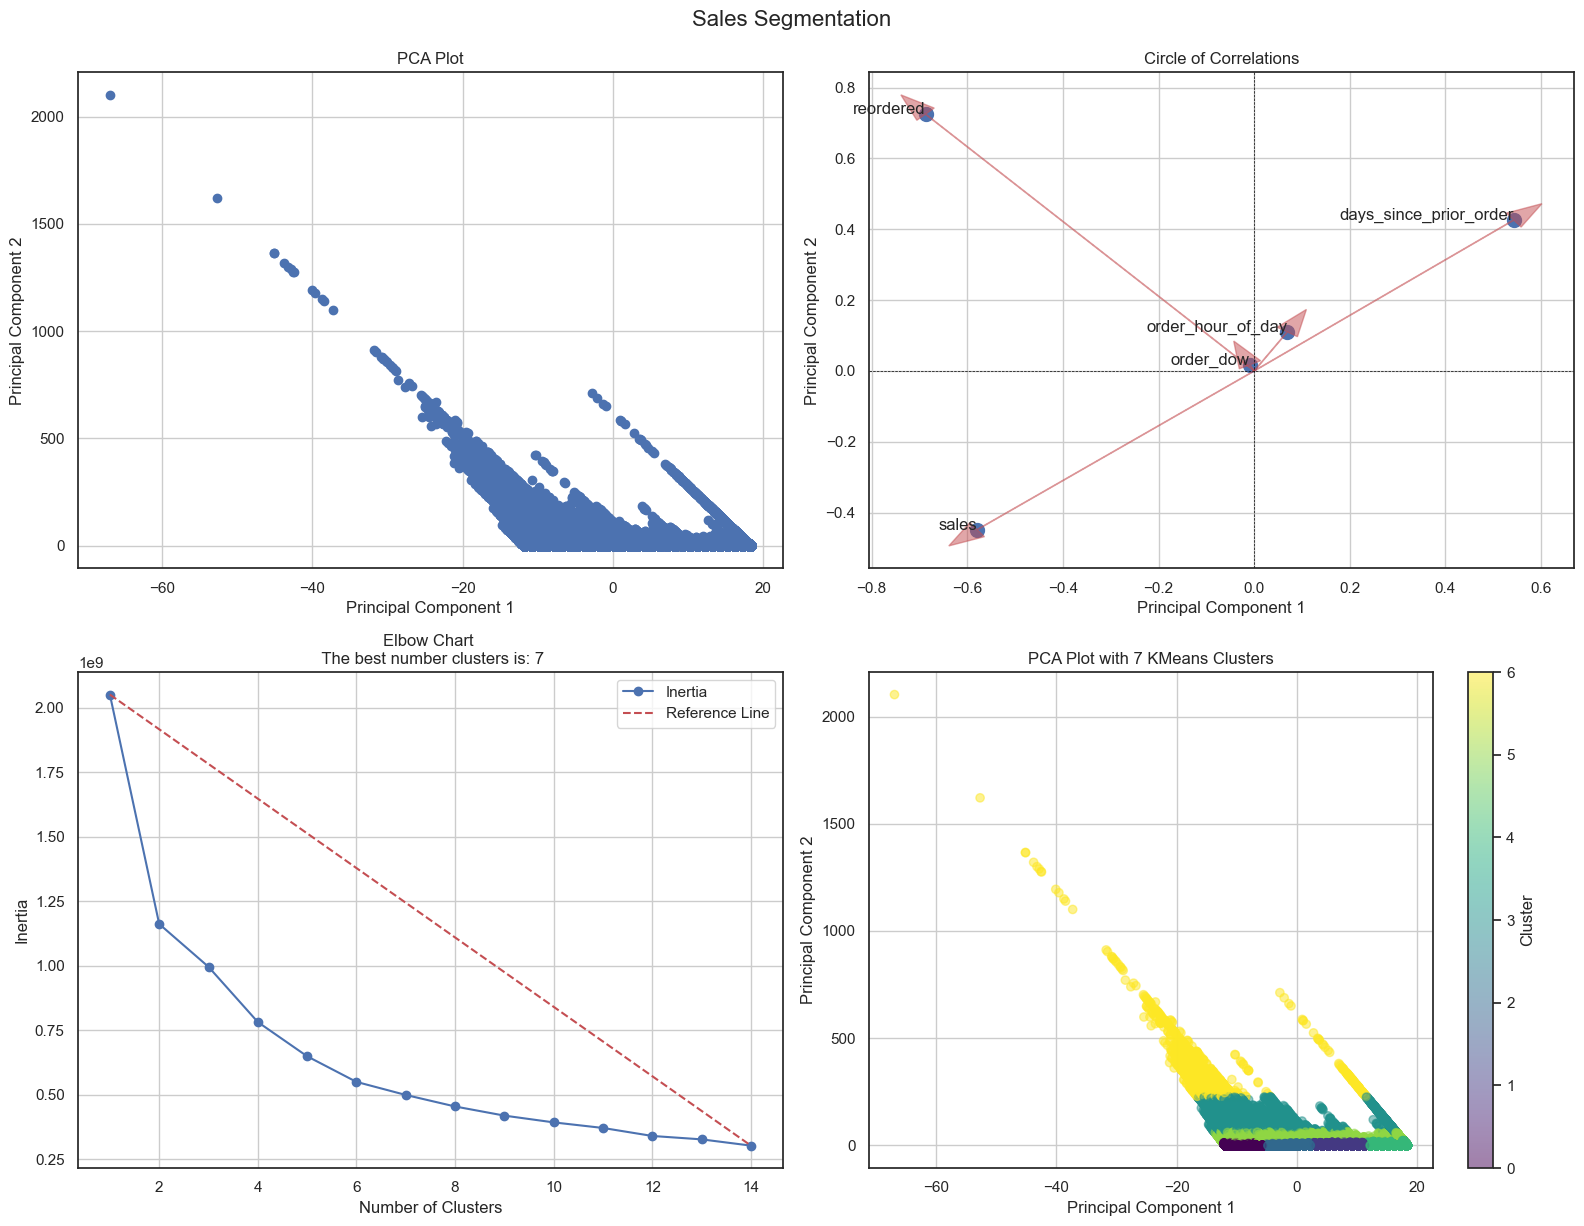

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca)
components_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("Componentes:", pca.explained_variance_ratio_)


corr_matrix = df_pca.corr()
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

eigenvalues[eigenvalues < 0] = 0


contributions = np.sqrt(eigenvalues) * eigenvectors


inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2) 
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2    

optimal_k = optimal_number_of_clusters(inertia)
print(f'The best number clusters is: {optimal_k}')


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot 1: PCA Plot
axes[0, 0].scatter(components_df['PC1'], components_df['PC2'])
axes[0, 0].set_title('PCA Plot')
axes[0, 0].set_xlabel('Principal Component 1')
axes[0, 0].set_ylabel('Principal Component 2')
axes[0, 0].grid(True)

# Plot 2: Circle of Correlations
axes[0, 1].scatter(contributions[:, 0], contributions[:, 1], marker='o', s=100)
for i in range(len(df_pca.columns)):
    x = contributions[i, 0]
    y = contributions[i, 1]
    axes[0, 1].arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    axes[0, 1].text(x, y, df_pca.columns[i], fontsize=12, ha='right')
axes[0, 1].set_title('Circle of Correlations')
axes[0, 1].set_xlabel('Principal Component 1')
axes[0, 1].set_ylabel('Principal Component 2')
axes[0, 1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axes[0, 1].axvline(0, color='black', linestyle='--', linewidth=0.5)
axes[0, 1].grid(True)

# Plot 3: Elbow Chart
axes[1, 0].plot(range(1, 15), inertia, marker='o', linestyle='-', color='b', label='Inertia')
axes[1, 0].plot([1, len(inertia)], [inertia[0], inertia[-1]], color='r', linestyle='--', label='Reference Line')
axes[1, 0].set_xlabel('Number of Clusters')
axes[1, 0].set_ylabel('Inertia')
axes[1, 0].set_title(f'Elbow Chart \n The best number clusters is: {optimal_k}')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: PCA Plot with KMeans Clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
components_df['Cluster'] = kmeans.fit_predict(components_df[['PC1', 'PC2']])
scatter = axes[1, 1].scatter(components_df['PC1'], components_df['PC2'], c=components_df['Cluster'], cmap='viridis', alpha=0.5)
axes[1, 1].set_title(f'PCA Plot with {optimal_k} KMeans Clusters')
axes[1, 1].set_xlabel('Principal Component 1')
axes[1, 1].set_ylabel('Principal Component 2')
axes[1, 1].grid(True)
fig.colorbar(scatter, ax=axes[1, 1], label='Cluster')

plt.tight_layout()
fig.suptitle('Sales Segmentation', fontsize=16, y=1.02)
plt.show()


# 1 Customer Segmentation: 
## Can you segment customers based on their ordering behavior, such as frequency, time of day, or days since prior order, to better understand their preferences and propose ways to optimize marketing strategies?
#### Building a df with clients, involving numerous columns with hotting ecolding, using PCA with the two main components adding up to **78** applying the distance between the point and the straight line to the greatest distance by the curve of the elbow to the distance chosen was 4, or there are **4 types of customers**, and was visualized by kmeans

In [376]:
df_customer_seg = df_order_products_products_aisles_departments_orders

In [377]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_customer_seg_user = df_customer_seg.groupby('user_id').agg({
    'department': lambda x: list(x),
    'order_dow': lambda x: list(x),
    'order_hour_of_day': lambda x: list(x),
    'days_since_prior_order': 'mean'
}).reset_index()

df_customer_seg_user_departments = pd.get_dummies(df_customer_seg.explode('department').set_index('user_id')['department']).groupby('user_id').sum().reset_index()

df_customer_seg_user_order_dow = pd.get_dummies(df_customer_seg.explode('order_dow').set_index('user_id')['order_dow'], prefix='order_dow').groupby('user_id').sum().reset_index()

df_customer_seg_user_order_hour_of_day = pd.get_dummies(df_customer_seg.explode('order_hour_of_day').set_index('user_id')['order_hour_of_day'], prefix='order_hour_of_day').groupby('user_id').sum().reset_index()

df_customer_seg_final = df_customer_seg_user[['user_id', 'days_since_prior_order']].merge(df_customer_seg_user_departments, on='user_id').merge(df_customer_seg_user_order_dow, on='user_id').merge(df_customer_seg_user_order_hour_of_day, on='user_id')
df_customer_seg_final = df_customer_seg_final.drop(columns='user_id')
df_customer_seg_final

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_customer_seg_final), columns=df_customer_seg_final.columns)
display(df_normalized)

,days_since_prior_order,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,...,order_hour_of_day_14,order_hour_of_day_15,order_hour_of_day_16,order_hour_of_day_17,order_hour_of_day_18,order_hour_of_day_19,order_hour_of_day_20,order_hour_of_day_21,order_hour_of_day_22,order_hour_of_day_23
0,0.675309,0.00000,0.000000,0.000000,0.011285,0.006122,0.0,0.000000,0.008339,0.000000,...,0.009524,0.008734,0.005520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.532234,0.00000,0.000000,0.003546,0.007812,0.006122,0.0,0.004065,0.030789,0.044025,...,0.000000,0.017467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.382906,0.00000,0.000000,0.000000,0.002604,0.000000,0.0,0.000000,0.013470,0.004193,...,0.015873,0.016376,0.022999,0.027576,0.016529,0.018443,0.000000,0.000000,0.000000,0.000000
3,0.511905,0.00292,0.000000,0.003546,0.002604,0.000000,0.0,0.004065,0.000000,0.004193,...,0.000000,0.007642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.483333,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.004065,0.005131,0.002096,...,0.000000,0.000000,0.008280,0.000000,0.028099,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0.688889,0.00000,0.001238,0.003546,0.000868,0.000000,0.0,0.000000,0.008980,0.006289,...,0.000000,0.008734,0.006440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
206205,0.134757,0.00000,0.000000,0.003546,0.028646,0.002041,0.0,0.036585,0.025016,0.010482,...,0.033333,0.027293,0.025759,0.052250,0.147107,0.086066,0.025260,0.000000,0.000000,0.000000
206206,0.495980,0.00000,0.001238,0.005319,0.017361,0.008163,0.0,0.044715,0.033355,0.016771,...,0.023810,0.030568,0.000000,0.000000,0.000000,0.049180,0.037147,0.006974,0.000000,0.000000
206207,0.248070,0.00000,0.003713,0.109929,0.017361,0.034694,0.0,0.044715,0.103271,0.058700,...,0.173016,0.159389,0.057038,0.026125,0.052893,0.053279,0.013373,0.000000,0.045082,0.007707


Componentes: [0.65517279 0.12737972]
The best number clusters is: 5


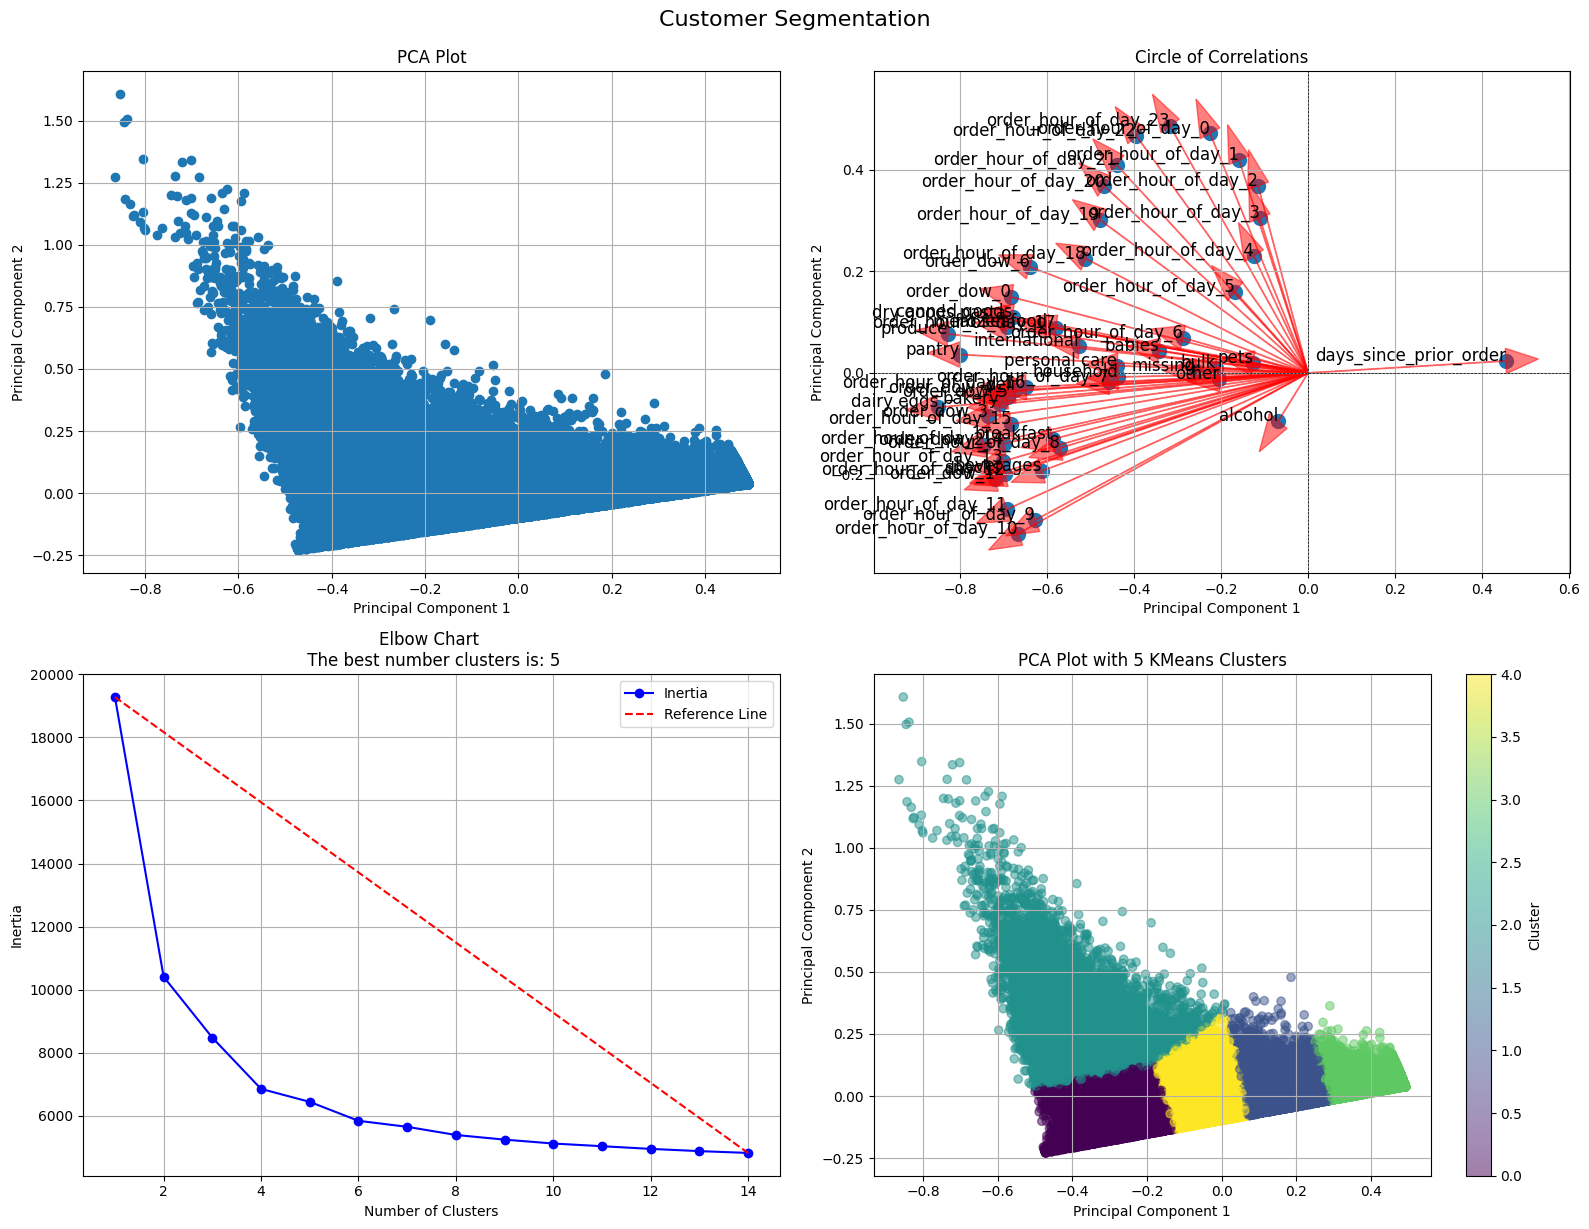

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_normalized)
components_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("Componentes:", pca.explained_variance_ratio_)

corr_matrix = df_normalized.corr()
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

eigenvalues[eigenvalues < 0] = 0


contributions = np.sqrt(eigenvalues) * eigenvectors


inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)  
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2   
    
optimal_k = optimal_number_of_clusters(inertia)
print(f'The best number clusters is: {optimal_k}')


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot 1: PCA Plot
axes[0, 0].scatter(components_df['PC1'], components_df['PC2'])
axes[0, 0].set_title('PCA Plot')
axes[0, 0].set_xlabel('Principal Component 1')
axes[0, 0].set_ylabel('Principal Component 2')
axes[0, 0].grid(True)

# Plot 2: Circle of Correlations
axes[0, 1].scatter(contributions[:, 0], contributions[:, 1], marker='o', s=100)
for i in range(len(df_normalized.columns)):
    x = contributions[i, 0]
    y = contributions[i, 1]
    axes[0, 1].arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    axes[0, 1].text(x, y, df_normalized.columns[i], fontsize=12, ha='right')
axes[0, 1].set_title('Circle of Correlations')
axes[0, 1].set_xlabel('Principal Component 1')
axes[0, 1].set_ylabel('Principal Component 2')
axes[0, 1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axes[0, 1].axvline(0, color='black', linestyle='--', linewidth=0.5)
axes[0, 1].grid(True)

# Plot 3: Elbow Chart
axes[1, 0].plot(range(1, 15), inertia, marker='o', linestyle='-', color='b', label='Inertia')
axes[1, 0].plot([1, len(inertia)], [inertia[0], inertia[-1]], color='r', linestyle='--', label='Reference Line')
axes[1, 0].set_xlabel('Number of Clusters')
axes[1, 0].set_ylabel('Inertia')
axes[1, 0].set_title(f'Elbow Chart \n The best number clusters is: {optimal_k}')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: PCA Plot with KMeans Clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
components_df['Cluster'] = kmeans.fit_predict(components_df[['PC1', 'PC2']])
scatter = axes[1, 1].scatter(components_df['PC1'], components_df['PC2'], c=components_df['Cluster'], cmap='viridis', alpha=0.5)
axes[1, 1].set_title(f'PCA Plot with {optimal_k} KMeans Clusters')
axes[1, 1].set_xlabel('Principal Component 1')
axes[1, 1].set_ylabel('Principal Component 2')
axes[1, 1].grid(True)
fig.colorbar(scatter, ax=axes[1, 1], label='Cluster')

plt.tight_layout()
fig.suptitle('Customer Segmentation', fontsize=16, y=1.02)
plt.show()


# 2 Inventory Management:
### Inventory Management: Implement a predictive model that estimates inventory levels
### for individual products across different departments and aisles, taking into consideration the day of the week and hour. Please note the following points:

### **!! The model considered that the same day of the month and the same time of the day, I mean these records are unique, as the number of the month and year was not given to me, so a purchase with the same number of the day and at the same time results in a add up to find out the number of products sold !!**

### Note 1 - The model should be predictive, not a forecasting model:
#### The predictive model is made up of two submodels: a classification model that decides whether the product will be sold or not, and another prediction model that determines the quantity of the product to be sold. The unique product name is coded according to each product's sales average. Both submodels utilize day of the week and time variables in addition to the encoded product. It is worth noting that **only products with more than 100 sales** were used in the model.

#### To feed the sales number prediction model, **sales outliers for each product were removed**. Data normalization was not performed due to the short time frame of the project and the fact that tree-based models, such as those used here, generally perform well even without normalization.

#### The first submodel, the DecisionTreeClassifier, which performed better than the regression model when compared and applied cross validation, has an accuracy of **0.75** for unsold products and **0.87** for sold products. The second submodel, DecisionTreeRegressor, was divided into a list of models according to the average sales of the product. Some products sell little due to the combination of time and number of the month, while others sell a lot. This approach helps improve the RMSE (Root Mean Squared Error) of each product by classifying them according to their different sales patterns.


### Note 2 - Explain how this predictive model can be applied to optimize stock levels and minimize waste:

#### This predictive model is applicable to optimize inventory levels and save waste as follows:
#### Demand Forecasting: Predicts whether a product will be sold and in what quantity, allowing precise adjustments to inventory levels to meet expected demand without excesses.
#### Inventory Management: Use sales flexibility to maintain ideal stocks, avoiding both shortages and excess products. This helps reduce waste due to obsolete or expired products.
#### Waste Reduction: Identifies and reduces stocks of products expected to be in low demand, minimizing the risk of waste and associated financial losses.
#### Operational Efficiency: Improves efficiency by aligning supply chain operations with demand specification, avoiding emergency orders and optimizing resource use.
#### Promotion and Pricing Strategies: Guides strategies to promote and price products based on sales solutions, maximizing return on inventory investment.
#### In short, this model helps companies manage their inventories more effectively, reducing operational costs and improving resource utilization while ensuring they are prepared to meet customer demand.

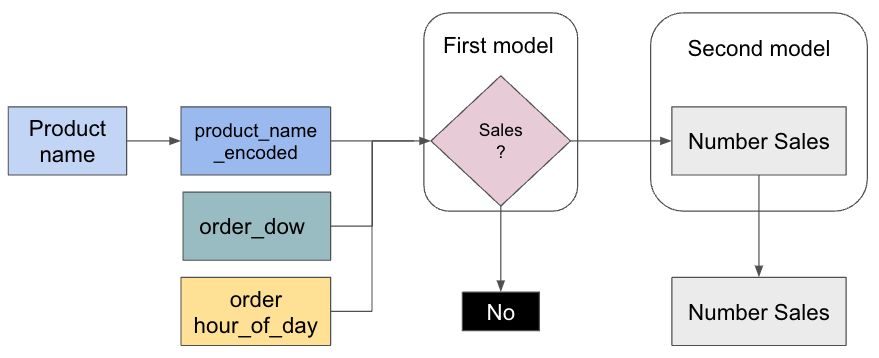

In [381]:
from IPython.display import display, Image
path_img = '/Users/marcobispo/Documents/Bees-Data-Challenge/model.png'
display(Image(filename=path_img))

In [327]:
import itertools
df_model = df_order_products_products_aisles_departments_orders
df_model = df_model.groupby(['product_name','order_dow','order_hour_of_day'])['add_to_cart_order'].count().reset_index()
df_model = df_model.rename(columns={'add_to_cart_order':'number_sales'})
df_model_products_100_sales = df_model.groupby(['product_name'])['number_sales'].sum().reset_index()
df_model_products_100_sales = df_model_products_100_sales[df_model_products_100_sales['number_sales']>100]
df_model_products_100_sales.sort_values(by='number_sales')
product_100_names = list(df_model_products_100_sales['product_name'])
product_100_names
df_model_v1 =df_model[df_model['product_name'].isin(product_100_names)]

global_mean = df_model_v1['number_sales'].mean()
alpha = 10  
def target_encode_smoothing(df, cat_column, target_column, alpha):
    mean_values = df.groupby(cat_column)[target_column].mean()
    counts = df.groupby(cat_column)[target_column].count()
    smooth = (mean_values * counts + global_mean * alpha) / (counts + alpha)
    return df[cat_column].map(smooth)
df_model_v1['product_name_encoded'] = target_encode_smoothing(df_model_v1, 'product_name', 'number_sales', alpha)
df_model_v1



order_dows = range(7)  
order_hours = range(24)  
combinations = pd.DataFrame(list(itertools.product(order_dows, order_hours)), columns=['order_dow', 'order_hour_of_day'])


product_names_encoded = df_model_v1[['product_name', 'product_name_encoded']].drop_duplicates()


all_combinations = pd.DataFrame([
    (product, encoded, dow, hour)
    for product, encoded in product_names_encoded.itertuples(index=False)
    for dow, hour in itertools.product(order_dows, order_hours)
], columns=['product_name', 'product_name_encoded', 'order_dow', 'order_hour_of_day'])


merged_merged_df_model_v1 = pd.merge(all_combinations, df_model_v1, on=['product_name', 'product_name_encoded', 'order_dow', 'order_hour_of_day'], how='left')


merged_merged_df_model_v1['number_sales'].fillna(0, inplace=True)


merged_merged_df_model_v1['sales_flag'] = (merged_merged_df_model_v1['number_sales'] > 0).astype(int)


merged_merged_df_model_v1.sort_values(by=['product_name', 'order_dow', 'order_hour_of_day'], inplace=True)


df_full_model = merged_merged_df_model_v1
df_full_model.to_csv('/Users/marcobispo/Documents/Bees-Data-Challenge/Data-Challenge-V/online-shopping-dataset/df_full_model.csv')

/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_4536/480862271.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_v1['product_name_encoded'] = target_encode_smoothing(df_model_v1, 'product_name', 'number_sales', alpha)
/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_4536/480862271.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].meth

,product_name,product_name_encoded,order_dow,order_hour_of_day,number_sales,sales_flag
0,#2 Coffee Filters,6.697013,0,0,0.0,0
1,#2 Coffee Filters,6.697013,0,1,0.0,0
2,#2 Coffee Filters,6.697013,0,2,1.0,1
3,#2 Coffee Filters,6.697013,0,3,0.0,0
4,#2 Coffee Filters,6.697013,0,4,0.0,0
...,...,...,...,...,...,...
3356467,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,3.796404,6,19,2.0,1
3356468,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,3.796404,6,20,1.0,1
3356469,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,3.796404,6,21,0.0,0
3356470,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,3.796404,6,22,0.0,0


In [252]:
def remove_outliers(df):
    df_cleaned = pd.DataFrame()
    for product_encoded, group in df.groupby('product_name_encoded'):
        q1 = group['number_sales'].quantile(0.25)
        q3 = group['number_sales'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_cleaned = pd.concat([df_cleaned, group[(group['number_sales'] >= lower_bound) & (group['number_sales'] <= upper_bound)]])
    return df_cleaned
df_cleaned = remove_outliers(df_model_v1)

Decision Tree Classifier:
Cross-validation scores: [0.83155567 0.83056186 0.83035543 0.83092363 0.83021285]
Mean accuracy: 0.8307218890586627

Logistic Regression:
Cross-validation scores: [0.80368627 0.80377565 0.80253285 0.80331173 0.80366286]
Mean accuracy: 0.8033938702634144


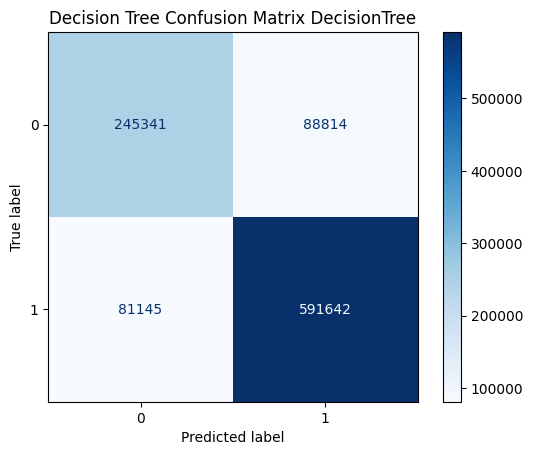

Decision Tree Classification Report:

              precision    recall  f1-score   support

    Not Sold       0.75      0.73      0.74    334155
        Sold       0.87      0.88      0.87    672787

    accuracy                           0.83   1006942
   macro avg       0.81      0.81      0.81   1006942
weighted avg       0.83      0.83      0.83   1006942

Simulation result (Decision Tree): 1

Logistic Regression Classification Report:

              precision    recall  f1-score   support

    Not Sold       0.76      0.60      0.67    334155
        Sold       0.82      0.90      0.86    672787

    accuracy                           0.80   1006942
   macro avg       0.79      0.75      0.76   1006942
weighted avg       0.80      0.80      0.80   1006942



In [419]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

X = df_full_model[['order_dow', 'order_hour_of_day', 'product_name_encoded']]
y = df_full_model['sales_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


tree_clf = DecisionTreeClassifier(random_state=42, max_depth=25, min_samples_split=30)
log_reg = LogisticRegression(random_state=42, max_iter=1000)


def cross_validate_model(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean()}")


print("Decision Tree Classifier:")
cross_validate_model(tree_clf, X_train, y_train, cv=5)

print("\nLogistic Regression:")
cross_validate_model(log_reg, X_train, y_train, cv=5)


tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)


cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree_clf.classes_)
disp_tree.plot(cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix DecisionTree')
plt.show()

report_tree = classification_report(y_test, y_pred_tree, target_names=['Not Sold', 'Sold'])
print("Decision Tree Classification Report:\n")
print(report_tree)


def simulate_new_data(order_dow, order_hour_of_day, product_name_encoded):
    new_data = pd.DataFrame({
        'order_dow': [order_dow],
        'order_hour_of_day': [order_hour_of_day],
        'product_name_encoded': [product_name_encoded]
    })
    prediction = tree_clf.predict(new_data)
    return prediction[0]

order_dow = 2
order_hour_of_day = 15
product_name_encoded = 2655.648825
resultado_tree = simulate_new_data(order_dow, order_hour_of_day, product_name_encoded)
print(f'Simulation result (Decision Tree): {resultado_tree}')


log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=['Not Sold', 'Sold'])
print("\nLogistic Regression Classification Report:\n")
print(report_log_reg)


In [416]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


data_sizes = [5, 10, 50, 100, 500, 1000, 5000]


models = []

dict_model_sales = {
    'rmse_scores' : [],
    'r2_scores' : [],
    'name_encoded' : []
}

for size in data_sizes:

    df_cleaned_name_encoded = df_cleaned[df_cleaned['product_name_encoded'] < size]
    

    X = df_cleaned_name_encoded[["order_dow", "order_hour_of_day", "product_name_encoded"]]
    y = df_cleaned_name_encoded["number_sales"]
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

    model = DecisionTreeRegressor(random_state=42, min_samples_leaf=10, splitter='best', max_features=None)
    model.fit(X_train, y_train)
    

    models.append(model)
    

    y_pred = model.predict(X_test)
    

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    dict_model_sales["rmse_scores"].append(rmse)
    dict_model_sales["r2_scores"].append(r2)
    dict_model_sales["name_encoded"].append(size)

df_models_n_sales = pd.DataFrame(dict_model_sales)
df_models_n_sales

,rmse_scores,r2_scores,name_encoded
0,1.398660,0.350079,5
1,2.034736,0.682016,10
2,3.700124,0.919236,50
3,4.477798,0.945939,100
4,6.319635,0.976847,500
5,7.451555,0.979324,1000
6,10.835825,0.975685,5000


In [417]:
dict_product = dict(zip(df_cleaned['product_name'], df_cleaned['product_name_encoded']))

def validar_numero(numero):
    faixas = [
        (0, 5),
        (5, 10),
        (10, 50),
        (50, 100),
        (100, 500),
        (500, 1000),
        (1000, 5000),
    ]
    for indice, (inicio, fim) in enumerate(faixas):
        if inicio <= numero < fim:
            return indice

def simulate_new_data_sales(order_dow, order_hour_of_day, product_name_encoded):

    result = df_model_v1.loc[
    (df_model_v1['product_name_encoded'] == product_name_encoded) &
    (df_model_v1['order_dow'] == order_dow) &
    (df_model_v1['order_hour_of_day'] == order_hour_of_day)
]

    real_register = result['number_sales'].iloc[0] if not result.empty else None
    new_data = pd.DataFrame({
        'order_dow': [order_dow],
        'order_hour_of_day': [order_hour_of_day],
        'product_name_encoded': [product_name_encoded]
    })
    prediction = clf.predict(new_data)
    
    new_data = {
        'order_dow': [order_dow],
        'order_hour_of_day': [order_hour_of_day],
        'product_name_encoded': [product_name_encoded]
    }
    new_df = pd.DataFrame(new_data)
    n = validar_numero(product_name_encoded)
    predictions = models[n].predict(new_df)
    
    
    for i, pred in enumerate(predictions):
        pred = round(pred, 0) 
        print(f"The product '{product}' order_dow: {new_data['order_dow'][0]} and order_hour_of_day: {new_data['order_hour_of_day'][0]} \n Will be sold {pred} times\
               One of the real records was {real_register}")

    
    return prediction[0]

def simulate_new_data_sale_0_1(order_dow, order_hour_of_day, product_name_encoded):
    new_data = pd.DataFrame({
        'order_dow': [order_dow],
        'order_hour_of_day': [order_hour_of_day],
        'product_name_encoded': [product_name_encoded]
    })
    prediction = clf.predict(new_data)
    if prediction == 1:
        simulate_new_data_sales(order_dow, order_hour_of_day, product_name_encoded)

    else:
        print(f"The product '{product}' order_dow: {new_data['order_dow'][0]} and order_hour_of_day: {new_data['order_hour_of_day'][0]} \n Will not be sold")
    return prediction[0]
    

product = '#2 Coffee Filters'
order_dow = 0
order_hour_of_day = 4
product_name_encoded = dict_product[product]
resultado = simulate_new_data_sale_0_1(order_dow, order_hour_of_day, product_name_encoded)

product = 'Banana'
order_dow = 0
order_hour_of_day = 0
product_name_encoded = dict_product[product]
resultado = simulate_new_data_sale_0_1(order_dow, order_hour_of_day, product_name_encoded)

product = 'Limes'
order_dow = 6
order_hour_of_day = 19
product_name_encoded = dict_product[product]
resultado = simulate_new_data_sale_0_1(order_dow, order_hour_of_day, product_name_encoded)

product = 'with Xylitol Original Flavor 18 Sticks Sugar Free Gum'
order_dow = 6
order_hour_of_day = 23
product_name_encoded = dict_product[product]
resultado = simulate_new_data_sale_0_1(order_dow, order_hour_of_day, product_name_encoded)

product = 'Organic Egg Whites'
order_dow = 5
order_hour_of_day = 3
product_name_encoded = dict_product[product]
resultado = simulate_new_data_sale_0_1(order_dow, order_hour_of_day, product_name_encoded)

The product '#2 Coffee Filters' order_dow: 0 and order_hour_of_day: 4 
 Will not be sold
The product 'Banana' order_dow: 0 and order_hour_of_day: 0 
 Will be sold 399.0 times               One of the real records was 560
The product 'Limes' order_dow: 6 and order_hour_of_day: 19 
 Will be sold 699.0 times               One of the real records was 755
The product 'with Xylitol Original Flavor 18 Sticks Sugar Free Gum' order_dow: 6 and order_hour_of_day: 23 
 Will not be sold
The product 'Organic Egg Whites' order_dow: 5 and order_hour_of_day: 3 
 Will be sold 5.0 times               One of the real records was 3


# 3 Order Fulfillment (Bonus points): 
### How can we optimize the order fulfillment process, considering factors like the day of the week and time of day when most orders are placed, to ensure timely and efficient deliveries to customers while minimizing operational costs?

#### To optimize the order fulfillment process, it is essential to better manage the number of employees and shifts. We observed that **days 0 and 1 (probably Saturday and Sunday) have the highest volume of purchases**.

#### Using a heat map to analyze the combination of day of the week and time of day, we identified a very high peak on days 0 and 1, between 8am and 6pm. Based on this data, if in the smallest combination of day and time 100 employees are needed, in the largest combination, up to 9778 employees may be needed. This means that **sales flow and media vary 100 times depending on the combination of day and time.**

#### There are practically **3 types of curves**, the first for day 0, the second for day 1 and the rest for the other days, that is, **we can standardize days 2,3,4,5,6 possibly being the week days** not the weekend days with this information, **it is possible to adjust the number of employees and shifts to meet demand**, ensuring efficient deliveries to customers and minimizing operational costs.

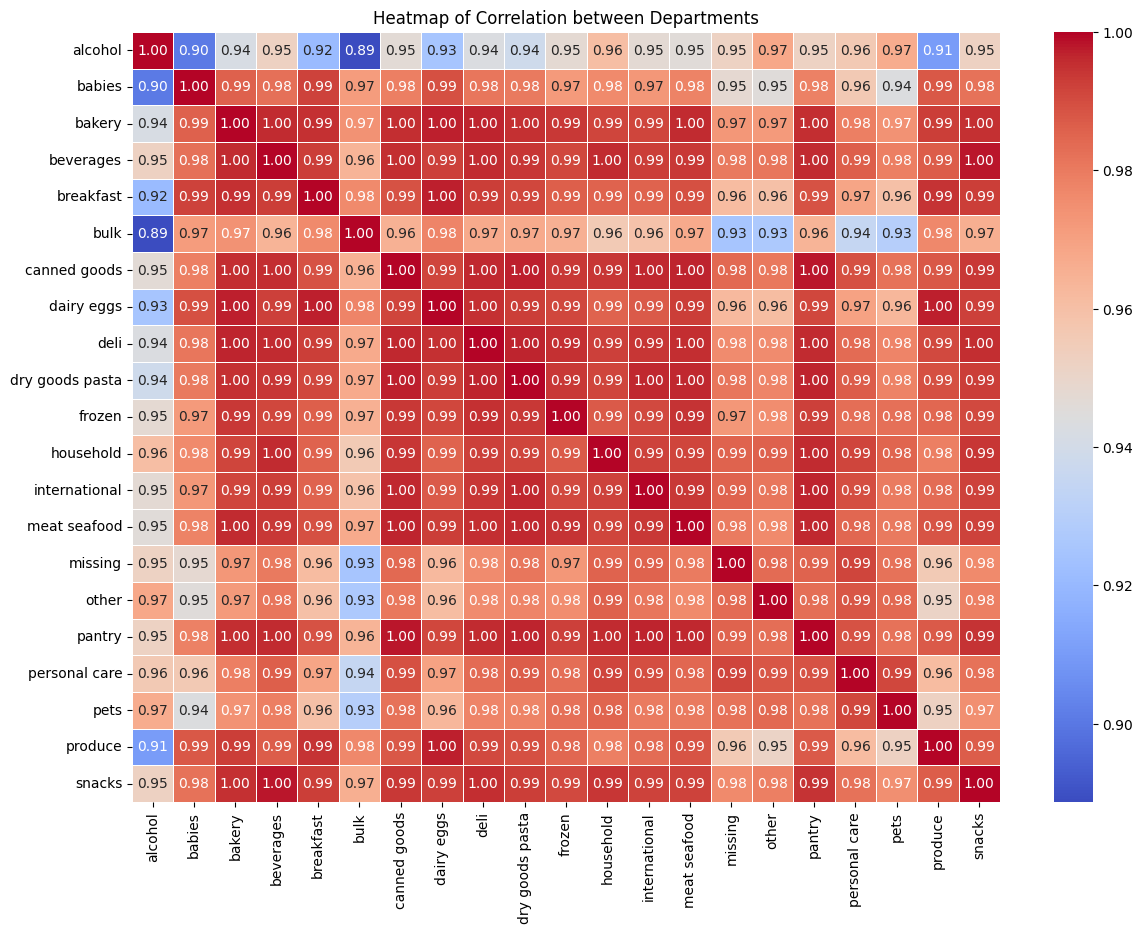

In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_order_fulfillment = df_order_products_products_aisles_departments_orders.groupby(['department','aisle','product_name','order_dow','order_hour_of_day'])['add_to_cart_order'].count().reset_index()
df_order_fulfillment = df_order_fulfillment.rename(columns={'add_to_cart_order':'sales_number'})
df_order_fulfillment_department = df_order_fulfillment[['department','sales_number','sales_number','order_dow','order_hour_of_day']]
df_encoded = pd.get_dummies(df_order_fulfillment_department, columns=['department'], prefix='', prefix_sep='')
df_summed = df_encoded.groupby(['order_dow', 'order_hour_of_day']).sum().reset_index()
cols_to_correlate = list(df_order_fulfillment_department['department'].unique())
corr_matrix = df_summed[cols_to_correlate].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation between Departments')
plt.show()

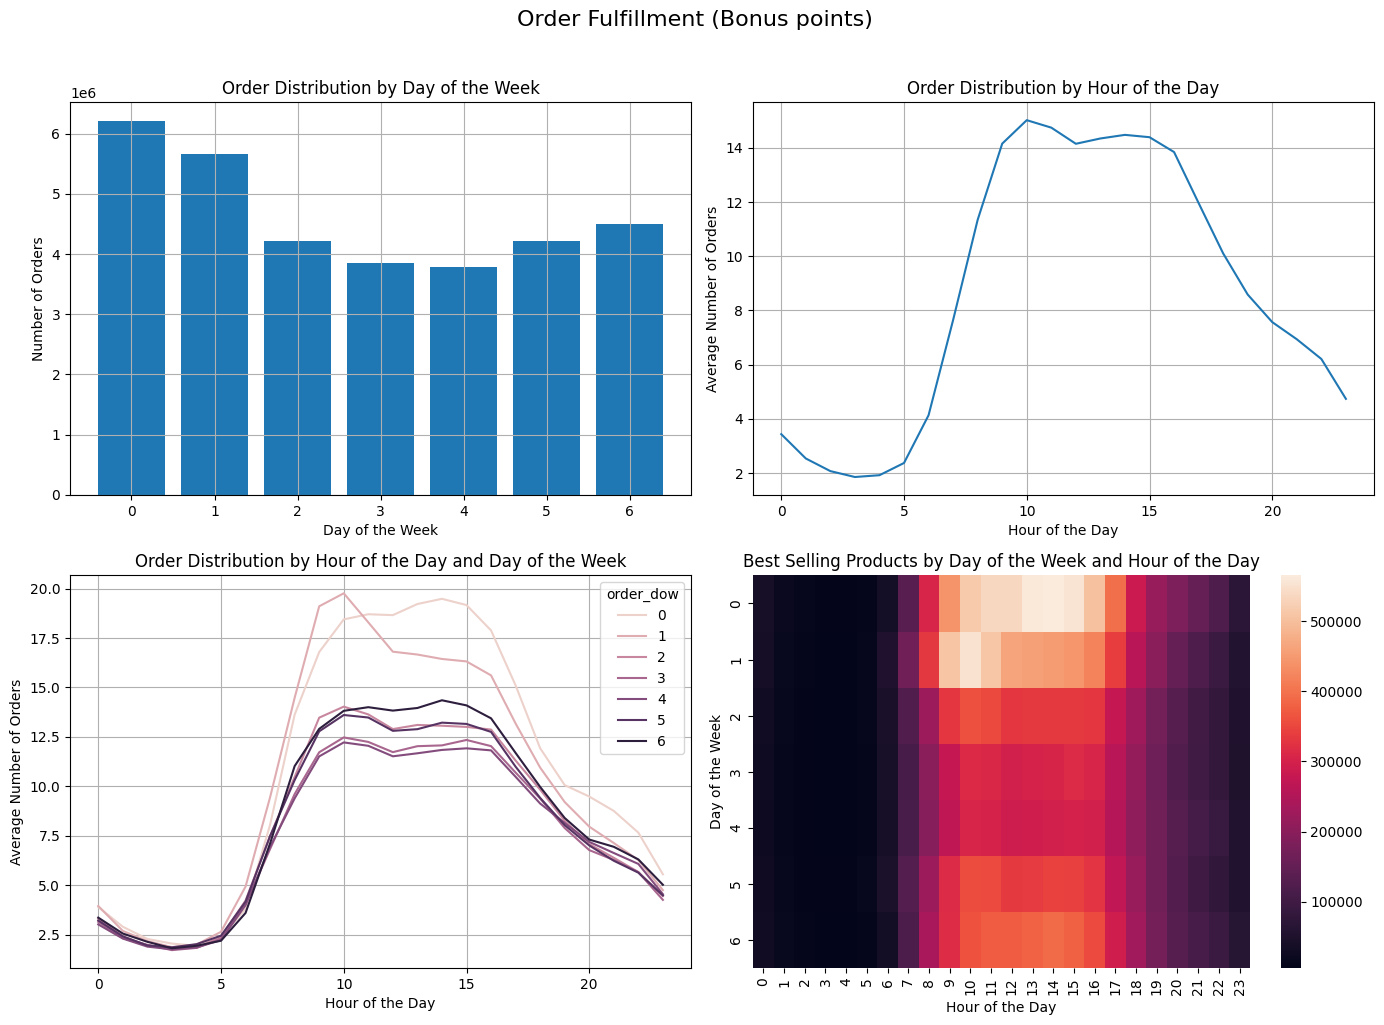

In [384]:
# Load the dataset
data = df_order_fulfillment

# Count the number of orders for each day of the week
orders_per_day = data.groupby('order_dow')['sales_number'].sum()


orders_per_hour = data.groupby('order_hour_of_day')['sales_number'].mean()


orders_per_hour_day = data.groupby(['order_hour_of_day', 'order_dow'])['sales_number'].mean().reset_index()


pivot_table = data.pivot_table(index='order_dow', columns='order_hour_of_day', values='sales_number', aggfunc='sum')


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar chart for orders by day of the week
axes[0, 0].bar(orders_per_day.index, orders_per_day.values)
axes[0, 0].set_xlabel('Day of the Week')
axes[0, 0].set_ylabel('Number of Orders')
axes[0, 0].set_title('Order Distribution by Day of the Week')
axes[0, 0].grid(True)

# Line plot for average orders by hour of the day
sns.lineplot(x=orders_per_hour.index, y=orders_per_hour.values, ax=axes[0, 1])
axes[0, 1].set_xlabel('Hour of the Day')
axes[0, 1].set_ylabel('Average Number of Orders')
axes[0, 1].set_title('Order Distribution by Hour of the Day')
axes[0, 1].grid(True)

# Line plot for average orders by hour of the day and day of the week
sns.lineplot(data=orders_per_hour_day, x='order_hour_of_day', y='sales_number', hue='order_dow', ax=axes[1, 0])
axes[1, 0].set_xlabel('Hour of the Day')
axes[1, 0].set_ylabel('Average Number of Orders')
axes[1, 0].set_title('Order Distribution by Hour of the Day and Day of the Week')
axes[1, 0].grid(True)

# Heatmap for sales by day of the week and hour of the day
sns.heatmap(pivot_table, ax=axes[1, 1])
axes[1, 1].set_xlabel('Hour of the Day')
axes[1, 1].set_ylabel('Day of the Week')
axes[1, 1].set_title('Best Selling Products by Day of the Week and Hour of the Day')

plt.suptitle('Order Fulfillment (Bonus points)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_4536/2023047861.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabela_pivot_normalized = tabela_pivot.applymap(lambda x: (x / min_value) * 100)


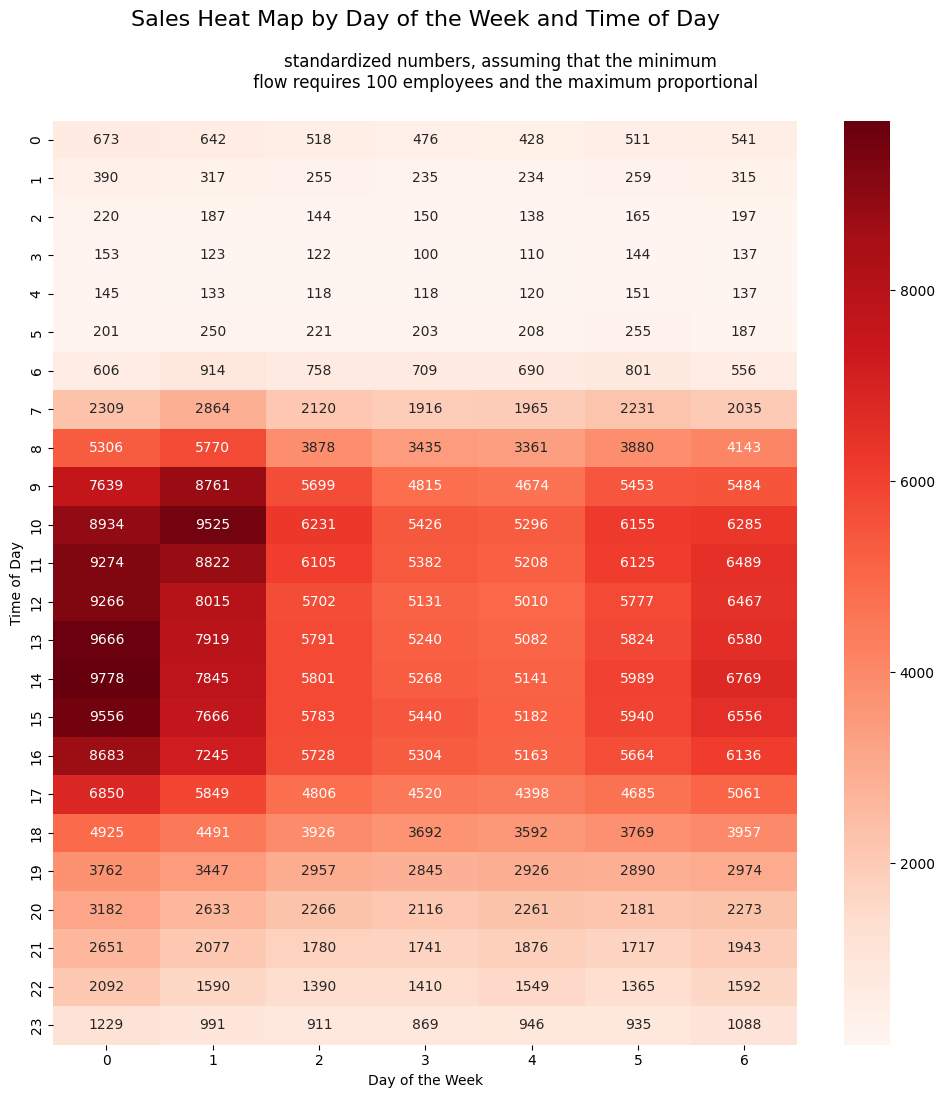

In [401]:
import pandas as pd
import numpy as np

tabela_pivot = data.pivot_table(index='order_dow', columns='order_hour_of_day', values='sales_number', aggfunc='sum')
min_value = tabela_pivot.min().min()
tabela_pivot_normalized = tabela_pivot.applymap(lambda x: (x / min_value) * 100)
tabela_pivot_normalized = tabela_pivot_normalized.round().astype(int)
tabela_pivot_transposed = tabela_pivot_normalized.transpose()
tabela_pivot_transposed = tabela_pivot_normalized.T
plt.figure(figsize=(12, 12))


sns.heatmap(tabela_pivot_transposed, annot=True, fmt="d", cmap="Reds")

plt.suptitle("standardized numbers, assuming that the minimum \n flow requires 100 employees and the maximum proportional", fontsize=12, y=0.92, va='center')
plt.title("Sales Heat Map by Day of the Week and Time of Day", fontsize=16, y=1.1, va='center')
plt.ylabel("Time of Day")
plt.xlabel("Day of the Week")

plt.show()


#  4 Given the brevity of this exercise:
## outline the additional work/action items you would take to solve this challenge if you were given 2 additional weeks to complete the assignment.

### Bayesian Analysis of Purchase Probability by Time:
#### Develop a Bayesian analysis to calculate the conditional probability of purchasing each product over time, considering seasonality and specific trends for each item.

### Study of Outliers in Purchasing:
#### Investigate outliers identified in purchases more deeply, using methods such as box plot graphs and anomaly detection models. This will help you identify patterns that could affect your inventory management and create a model to alert you to these anomalies.

### Statistical Analysis of Shopping Aisles:
#### Perform statistical analyzes provided to correlate purchasing patterns with the physical location of products in the store aisles, identifying insights that can optimize product placement and sales management.

### Predictive Model Refinement:
#### Refine the existing predictive model using more advanced algorithms such as XGBoost and Random Forest, adjusting hyperparameters and implementing techniques such as cross-validation (k-fold) to improve the results and robustness of the model.

### Time Series Analysis:
#### Use additional data, such as the number of the month and year, to develop time series models using methods such as Pearson, to evaluate the probability of sales of each product in different time periods.

### Review and Improvement of Work:
#### Review and improve all previous steps, ensuring that all analyzes and methods applied make sense from a technical point of view and are aligned with the project objectives.

## python --version Python 3.9.6
## Requiements
### appnope==0.1.4
### asttokens==2.4.1
### category-encoders==2.6.3
### comm==0.2.2
### contourpy==1.2.1
### cycler==0.12.1
### debugpy==1.8.2
### decorator==5.1.1
### exceptiongroup==1.2.1
### executing==2.0.1
### fonttools==4.53.1
### importlib_metadata==8.0.0
### importlib_resources==6.4.0
### ipykernel==6.29.5
### ipython==8.18.1
### jedi==0.19.1
### joblib==1.4.2
### jupyter_client==8.6.2
### jupyter_core==5.7.2
### kiwisolver==1.4.5
### matplotlib==3.9.1
### matplotlib-inline==0.1.7
### mlxtend==0.23.1
### nest-asyncio==1.6.0
### numpy==2.0.0
### packaging==24.1
### pandas==2.2.2
### parso==0.8.4
### patsy==0.5.6
### pexpect==4.9.0
### pillow==10.4.0
### platformdirs==4.2.2
### plotly==5.22.0
### prompt_toolkit==3.0.47
### psutil==6.0.0
### ptyprocess==0.7.0
### pure-eval==0.2.2
### Pygments==2.18.0
### pyparsing==3.1.2
### python-dateutil==2.9.0.post0
### pytz==2024.1
### pyzmq==26.0.3
### scikit-learn==1.5.1
### scipy==1.13.1
### seaborn==0.13.2
### six==1.16.0
### stack-data==0.6.3
### statsmodels==0.14.2
### tenacity==8.5.0
### threadpoolctl==3.5.0
### tornado==6.4.1
### traitlets==5.14.3
### typing_extensions==4.12.2
### tzdata==2024.1
### wcwidth==0.2.13
### zipp==3.19.2
